variable of

# STAT207 Final Project - Predicting Arsenal FC's Game Result

## Group: Peter Guan, Songyang Chen, Om Patel, Jun Kim

In [1]:
!pip install statsmodels==0.14.4


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
sns.set()
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tools.sm_exceptions import PerfectSeparationWarning

### 1. Introduction

In this project, we'll build a predictive model for Arsenal FC's match results. This model will use some factors that can be easily determined before the match starts, so it can be used to make a simple prediction about the match result. For example, it is easy to have Arsenal's previous season Premier League standing from the Internet.

Lots of people will be interested in this predictive model. Soccer fans would be a large portion of them. Arsenal fans would be happy to have a model that could give them a predicted match result for their home team, and other teams' fans can also use this predictive model when their team has a match with Arsenal. On the other hand, data analysts of soccer clubs will also find this model to be useful, since it will not only give them a predicted result of the match but also the relationships between some factors (explanatory variables) and the match result. For entrepreneurs in this field,  analytics in sports can also enhance the live game experience, maintain fan and sponsor participation and help with strategic decision-making for clubs, which would bring them more revenues.[1][2]

For this model, we believe that both classifying "positives" and "negatives" are important, so there's no significant preference. But if there has to be a preference, then people might care more about classifying "positives", since predicting Arsenal to win, but finally, the team loses or draws will make Arsenal fans disappointed.

Reference:
[1]COJOCARIU, Irina-Cristina. “PREDICTIVE MODELS APPLIED in SPORTS MANAGEMENT –LITERATURE REVIEW on RESEARCH TRENDS.” Journal of Public Administration, Finance and Law, no. 23, 2022, pp. 148–153, https://doi.org/10.47743/jopafl-2022-23-11.
[2]Giorgio, Pete. “How Data Can Help Drive Sports Sponsorship and Fan Engagement.” Deloitte United States, 4 July 2019, www2.deloitte.com/us/en/pages/consumer-business/articles/fan-engagement-analytics-improve-fan-experiences.html.

Primary Research Goal: 
The primary research goal of this project is to build a predictive model that will perform the best when predicting Arsenal’s game results in new datasets.

Secondary Research Goal of Analysis:
Ideally, we would like our chosen model to also yield reliable interpretative insights about the nature of the relationship between the variables in the dataset.

Secondary Research Goal of Analysis:
We should also thoroughly describe the nature of the variables as well as the relationship between the variables that we would like to use in our model. These descriptive analytics techniques that we use should be interpreted in the context of our primary research goal.

### 2. Dataset Discussion

In this project, we'll use 2 datasets.

1. 'matches.csv': This dataset contains all of Arsenal's Premier League matches from 2017-08-11 to 2023-02-25. Each row represents a match, and columns describe some more information about that match. The dataset contains all Arsenal's Premier League matches from the 2017-18 season to February 28, 2023. The author didn't clarify the method which the dataset was collected, but it is easy to find the match records on any sports website (such as sofascore).
This dataset is from Kaggle, created by Rustem Nagimov.
Download link: https://www.kaggle.com/daby tasets/rustemnagimov/arsenal-epl-dataset?select=matches.csv
Songyang Chen downloaded this dataset through the link above on April 22, 2025.

2. 'pl-tables-1993-2024.csv': This dataset contains the English Premier League's records of season standings from the 1992-93 season through the 2023-24 season. Each row represents a team's standing in a certain season. You can simply consider it as a vertical concatenation of Premier League standing tables through seasons. The author didn't clarify the method by which the dataset is collected, but it is easy to find the standings on any sports website (such as sofascore). This dataset includes all seasons from the first season of the Premier League to the latest season when this project is done, as well as all the teams' records in each season.
This dataset is from Kaggle, created by Evan Gower.
Download link: https://www.kaggle.com/datasets/evangower/english-premier-league-standings
Songyang Chen downloaded this dataset through the link above on April 22, 2025.

In [3]:
df_matches = pd.read_csv('matches.csv', keep_default_na=False)
df_matches.head(5)

,Season,Tour,Date,Time,Opponent,HoAw,ArsenalScore,OpponentScore,Stadium,Attendance,Coach,Referee
0,2017/18,1,2017-08-11,20:45:00,Leicester,home,4,3,Emirates Stadium,59387,Arsène Wenger,Mike Dean
1,2017/18,2,2017-08-19,18:30:00,Stoke City,away,0,1,bet365 Stadium,29459,Arsène Wenger,Andre Marriner
2,2017/18,3,2017-08-27,17:00:00,Liverpool,away,0,4,Anfield,53206,Arsène Wenger,Craig Pawson
3,2017/18,4,2017-09-09,16:00:00,Bournemouth,home,3,0,Emirates Stadium,59262,Arsène Wenger,Anthony Taylor
4,2017/18,5,2017-09-17,14:30:00,Chelsea,away,0,0,Stamford Bridge,41478,Arsène Wenger,Michael Oliver


In [4]:
print('number of rows in matches.csv:', df_matches.shape[0])

number of rows in matches.csv: 214


In [5]:
df_tables = pd.read_csv('pl-tables-1993-2024.csv', keep_default_na=False)
df_tables.head()

,season_end_year,team,position,played,won,drawn,lost,gf,ga,gd,points,notes
0,1993,Manchester Utd,1,42,24,12,6,67,31,36,84,→ Champions League via league finish
1,1993,Aston Villa,2,42,21,11,10,57,40,17,74,→ UEFA Cup via league finish
2,1993,Norwich City,3,42,21,9,12,61,65,-4,72,→ UEFA Cup via league finish 1
3,1993,Blackburn,4,42,20,11,11,68,46,22,71,
4,1993,QPR,5,42,17,12,13,63,55,8,63,


In [6]:
print('number of rows in pl-tables-1993-2024.csv:', df_tables.shape[0])

number of rows in pl-tables-1993-2024.csv: 646


### Response variable

In this project, we'll create a new variable called "Result" as our response variable. This will be a binary categorical variable, indicating whether Arsenal wins the match. The variable will be created by columns "ArsenalScore" and "OpponentScore" in matches.csv.

### Explanatory variables

Tour: the match week of the match. (numerical, from 1-38)
Time: the time the match started. Originally, the exact time, but we'll convert it into a categorical variable with 3 categories: noon, afternoon, and night.
HoAw: if the match is home or away for Arsenal. (categorical, home/away)
Attendance: match attendance(number of audience). (numerical variable)
Coach: Arsenal's coach for the match. (categorical variable with 4 categories)
Opponent_Position: Opponent's EPL position in the previous season. (numerical variable, from 1-20)
Opponent_Points: Opponent's EPL points in the previous season. (numerical variable)
Arsenal_Position: Arsenal's EPL position in the previous season. (numerical variable, from 1-20)
Arsenal_Points: Arsenal's EPL points in the previous season. (numerical variable)

Except for HoAw, Coach, Tour, and Attendance, all other explanatory variables are being created from the dataset. This process will be done in the Dataset Cleaning.

We choose Tour, Time, HoAw, Attendance, and Coach since they are common factors that will influence the match's result. We use Arsenal's previous season position and points to indicate their ability this season. We do the same thing to the opponents and drop the column Opponent, since including it in our model will result in more than 20 indicator variables.

### 3. Dataset Cleaning

Now, let's first drop all the columns in matches.csv that we won't use. Also, we'll create a new column, Result, which indicates whether Arsenal won the match.

In [7]:
df_matches_cleaned = df_matches[['Season', 'Tour', 'Time', 'Opponent', 'HoAw', 'Attendance', 'Coach']]
df_matches_cleaned['Result'] = (df_matches['ArsenalScore'] > df_matches['OpponentScore']).replace({True: 'Win', False: 'Not Win'})
df_matches_cleaned.head()

,Season,Tour,Time,Opponent,HoAw,Attendance,Coach,Result
0,2017/18,1,20:45:00,Leicester,home,59387,Arsène Wenger,Win
1,2017/18,2,18:30:00,Stoke City,away,29459,Arsène Wenger,Not Win
2,2017/18,3,17:00:00,Liverpool,away,53206,Arsène Wenger,Not Win
3,2017/18,4,16:00:00,Bournemouth,home,59262,Arsène Wenger,Win
4,2017/18,5,14:30:00,Chelsea,away,41478,Arsène Wenger,Not Win


Then we are going to check missing values in the dataset.

In [8]:
df_matches_cleaned.dtypes

Season        object
Tour           int64
Time          object
Opponent      object
HoAw          object
Attendance     int64
Coach         object
Result        object
dtype: object

In [9]:
np.unique(df_matches_cleaned['Time'])

array(['13:00:00', '13:30:00', '14:30:00', '15:00:00', '15:05:00',
       '15:15:00', '16:00:00', '17:00:00', '17:30:00', '18:15:00',
       '18:30:00', '19:00:00', '20:00:00', '20:15:00', '20:30:00',
       '20:45:00', '21:00:00', '21:15:00'], dtype=object)

In [10]:
np.unique(df_matches_cleaned['Opponent'])

array(['Aston Villa', 'Bournemouth', 'Brentford', 'Brighton', 'Burnley',
       'Cardiff', 'Chelsea', 'Crystal Palace', 'Everton', 'Fulham',
       'Huddersfield', 'Leeds', 'Leicester', 'Liverpool', 'Man City',
       'Man Utd', 'Newcastle', 'Norwich', 'Nottingham Forest',
       'Sheff Utd', 'Southampton', 'Stoke City', 'Swansea', 'Tottenham',
       'Watford', 'West Brom', 'West Ham', 'Wolves'], dtype=object)

In [11]:
np.unique(df_matches_cleaned['HoAw'])

array(['away', 'home'], dtype=object)

In [12]:
np.unique(df_matches_cleaned['Coach'])

array(['Albert Stuivenberg', 'Arsène Wenger', 'Freddie Ljungberg',
       'Mikel Arteta', 'Unai Emery'], dtype=object)

All columns with type object are checked so that there are no implicit missing values. Then let's check the int64 columns.

<AxesSubplot: ylabel='Attendance'>

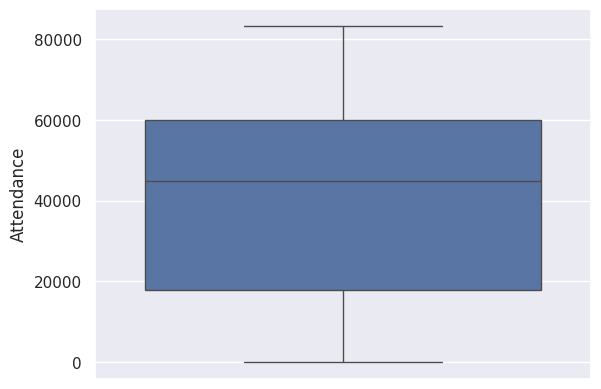

In [13]:
sns.boxplot(df_matches_cleaned['Attendance'])

<AxesSubplot: ylabel='Tour'>

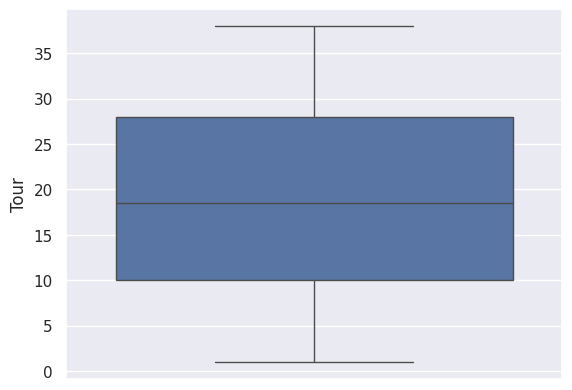

In [14]:
sns.boxplot(df_matches_cleaned['Tour'])

The range of Attendance and Tour does not indicate any implicit missing value. Worth noticing that there are 0s in Attendance, which represent real data points. (During COVID-19, there's no attendance in soccer matches)

Then let's drop all the rows and columns in pl-tables-1993-2024.csv that we won't use. Specifically, we're only interested in team standings from season of the season of 2017/18 to the season of 2021/22. Also, the way that the two datasets represent the season is different: for the season of 2017-2018, the first dataset uses 2017/18, while the second dataset uses 2018, which is the end year of the season. And since we care about the team's previous season Premier League position and points, we'll use the replace function to create a new column next season with the representations of the season substituted. This column is for merging dataframes.

In [15]:
df_tables_cleaned = df_tables[(df_tables.season_end_year >= 2017) & (df_tables.season_end_year <= 2022)]
df_tables_cleaned = df_tables_cleaned[['season_end_year', 'team', 'position', 'points']]
df_tables_cleaned['next season'] = df_tables_cleaned['season_end_year'].replace({2017: '2017/18', 2018:'2018/19', 2019: '2019/20', 2020: '2020/21', 2021: '2021/22', 2022: '2022/23'})
df_tables_cleaned = df_tables_cleaned.drop(columns=['season_end_year'])
df_tables_cleaned.head()

,team,position,points,next season
486,Chelsea,1,93,2017/18
487,Tottenham,2,86,2017/18
488,Manchester City,3,78,2017/18
489,Liverpool,4,76,2017/18
490,Arsenal,5,75,2017/18


Similarly, check for implicit missing values in this dataset.

In [16]:
df_tables_cleaned.dtypes

team           object
position        int64
points          int64
next season    object
dtype: object

In [17]:
np.unique(df_tables_cleaned['team'])

array(['Arsenal', 'Aston Villa', 'Bournemouth', 'Brentford', 'Brighton',
       'Burnley', 'Cardiff City', 'Chelsea', 'Crystal Palace', 'Everton',
       'Fulham', 'Huddersfield', 'Hull City', 'Leeds United',
       'Leicester City', 'Liverpool', 'Manchester City', 'Manchester Utd',
       'Middlesbrough', 'Newcastle Utd', 'Norwich City', 'Sheffield Utd',
       'Southampton', 'Stoke City', 'Sunderland', 'Swansea City',
       'Tottenham', 'Watford', 'West Brom', 'West Ham', 'Wolves'],
      dtype=object)

But now we have found another problem: the team's names in the two datasets are also different. For example, Cardiff is called Cardiff City in matches.csv. So, we need to replace the team names in matches.csv with the same representations as in pl-tables-1993-2024.csv.

In [18]:
np.unique(df_matches_cleaned['Opponent'])

array(['Aston Villa', 'Bournemouth', 'Brentford', 'Brighton', 'Burnley',
       'Cardiff', 'Chelsea', 'Crystal Palace', 'Everton', 'Fulham',
       'Huddersfield', 'Leeds', 'Leicester', 'Liverpool', 'Man City',
       'Man Utd', 'Newcastle', 'Norwich', 'Nottingham Forest',
       'Sheff Utd', 'Southampton', 'Stoke City', 'Swansea', 'Tottenham',
       'Watford', 'West Brom', 'West Ham', 'Wolves'], dtype=object)

In [19]:
df_matches_cleaned['Opponent'] = df_matches_cleaned['Opponent'].replace({'Cardiff': 'Cardiff City',
																		 'Leeds': 'Leeds United',
																		 'Leicester': 'Leicester City',
																		 'Man City': 'Manchester City',
																		 'Man Utd': 'Manchester Utd',
																		 'Newcastle': 'Newcastle Utd',
																		 'Norwich': 'Norwich City',
																		 'Sheff Utd': 'Sheffield Utd',
																		 'Swansea': 'Swansea City'})

Now, continue checking implicit missing values.

<AxesSubplot: ylabel='position'>

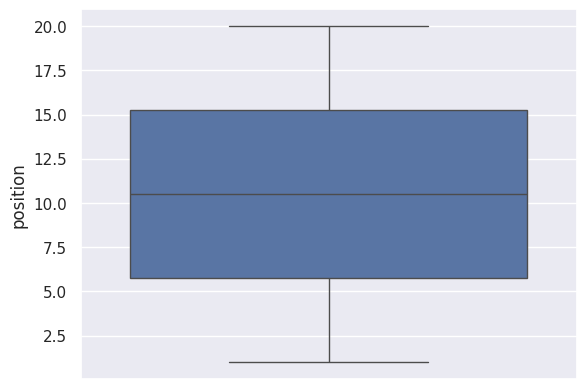

In [20]:
sns.boxplot(df_tables_cleaned['position'])

<AxesSubplot: ylabel='points'>

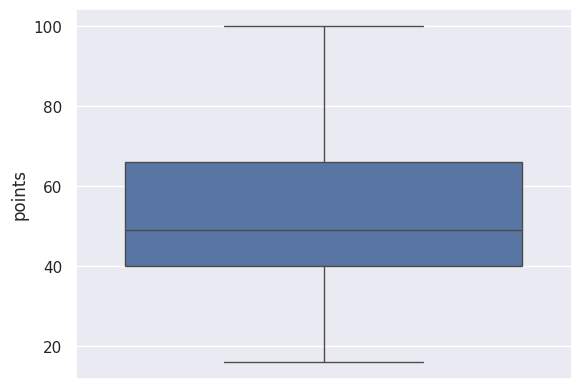

In [21]:
sns.boxplot(df_tables_cleaned['points'])

It turns out that there aren't any implicit missing values in this dataset either.

Another thing we have to do is to change the column Time into a categorical variable with 3 categories: noon, afternoon, and night. This will be done by using pandas' to_datetime function and a datetime object.

In [22]:
df_matches_cleaned['Time'] = pd.to_datetime(df_matches_cleaned['Time'], format='%H:%M:%S').dt.time
def categorize_time(time_obj):
    hour = time_obj.hour
    if 12 <= hour < 14:
        return 'noon'
    elif 14 <= hour < 18:
        return 'afternoon'
    else:
        return 'night'
df_matches_cleaned['Time'] = df_matches_cleaned['Time'].apply(categorize_time)
df_matches_cleaned.head()

,Season,Tour,Time,Opponent,HoAw,Attendance,Coach,Result
0,2017/18,1,night,Leicester City,home,59387,Arsène Wenger,Win
1,2017/18,2,night,Stoke City,away,29459,Arsène Wenger,Not Win
2,2017/18,3,afternoon,Liverpool,away,53206,Arsène Wenger,Not Win
3,2017/18,4,afternoon,Bournemouth,home,59262,Arsène Wenger,Win
4,2017/18,5,afternoon,Chelsea,away,41478,Arsène Wenger,Not Win


Now let's check the variable Coach.

In [23]:
df_matches_cleaned['Coach'].value_counts()

Coach
Mikel Arteta          119
Unai Emery             51
Arsène Wenger          38
Freddie Ljungberg       5
Albert Stuivenberg      1
Name: count, dtype: int64

It is obvious that Freddie Ljungberg and Albert Stuivenberg are only coaches for a few matches. We should drop them into our project.

In [24]:
df_matches_cleaned = df_matches_cleaned[(df_matches_cleaned.Coach != 'Freddie Ljungberg')&(df_matches_cleaned.Coach != 'Albert Stuivenberg')]

Let's merge 2 DataFrames to introduce columns that stand for opponents' previous season Premier League standings.

In [25]:
df = pd.merge(df_matches_cleaned, df_tables_cleaned, how='left', left_on=['Season', 'Opponent'], right_on=['next season', 'team'])
df.head()

,Season,Tour,Time,Opponent,HoAw,Attendance,Coach,Result,team,position,points,next season
0,2017/18,1,night,Leicester City,home,59387,Arsène Wenger,Win,Leicester City,12.0,44.0,2017/18
1,2017/18,2,night,Stoke City,away,29459,Arsène Wenger,Not Win,Stoke City,13.0,44.0,2017/18
2,2017/18,3,afternoon,Liverpool,away,53206,Arsène Wenger,Not Win,Liverpool,4.0,76.0,2017/18
3,2017/18,4,afternoon,Bournemouth,home,59262,Arsène Wenger,Win,Bournemouth,9.0,46.0,2017/18
4,2017/18,5,afternoon,Chelsea,away,41478,Arsène Wenger,Not Win,Chelsea,1.0,93.0,2017/18


Now, the merge might result in some missing values. In fact, there should be missing values, since some teams may not have previous season Premier League position and points because they come from the Champions League.

In [26]:
df[df.position.isna()].shape[0]

32

There are 32 rows with missing values. Let's drop them all.

In [27]:
df = df[~df.position.isna()]

In [28]:
df[df.position.isna()].shape[0]

0

Now there's no row with a missing value.

Let's rename our new columns.

In [29]:
df = df.rename(columns={'position': 'Opponent_Position', 'points': 'Opponent_Points'})
df.head()

,Season,Tour,Time,Opponent,HoAw,Attendance,Coach,Result,team,Opponent_Position,Opponent_Points,next season
0,2017/18,1,night,Leicester City,home,59387,Arsène Wenger,Win,Leicester City,12.0,44.0,2017/18
1,2017/18,2,night,Stoke City,away,29459,Arsène Wenger,Not Win,Stoke City,13.0,44.0,2017/18
2,2017/18,3,afternoon,Liverpool,away,53206,Arsène Wenger,Not Win,Liverpool,4.0,76.0,2017/18
3,2017/18,4,afternoon,Bournemouth,home,59262,Arsène Wenger,Win,Bournemouth,9.0,46.0,2017/18
4,2017/18,5,afternoon,Chelsea,away,41478,Arsène Wenger,Not Win,Chelsea,1.0,93.0,2017/18


We also want 2 columns that represent Arsenal's previous season Premier League position and points. To do that, we first create a DataFrame that contains Arsenal's Premier League standings during the 6 seasons.

In [30]:
df_arsenal_standings = df_tables_cleaned[df_tables_cleaned.team == 'Arsenal']
df_arsenal_standings

,team,position,points,next season
490,Arsenal,5,75,2017/18
511,Arsenal,6,63,2018/19
530,Arsenal,5,70,2019/20
553,Arsenal,8,56,2020/21
573,Arsenal,8,61,2021/22
590,Arsenal,5,69,2022/23


Then merge 2 DataFrames to create new columns for Arsenal's previous season standings and rename the columns.

In [31]:
df = pd.merge(df, df_arsenal_standings, how='left', left_on=['Season'], right_on=['next season'])
df.head()

,Season,Tour,Time,Opponent,HoAw,Attendance,Coach,Result,team_x,Opponent_Position,Opponent_Points,next season_x,team_y,position,points,next season_y
0,2017/18,1,night,Leicester City,home,59387,Arsène Wenger,Win,Leicester City,12.0,44.0,2017/18,Arsenal,5,75,2017/18
1,2017/18,2,night,Stoke City,away,29459,Arsène Wenger,Not Win,Stoke City,13.0,44.0,2017/18,Arsenal,5,75,2017/18
2,2017/18,3,afternoon,Liverpool,away,53206,Arsène Wenger,Not Win,Liverpool,4.0,76.0,2017/18,Arsenal,5,75,2017/18
3,2017/18,4,afternoon,Bournemouth,home,59262,Arsène Wenger,Win,Bournemouth,9.0,46.0,2017/18,Arsenal,5,75,2017/18
4,2017/18,5,afternoon,Chelsea,away,41478,Arsène Wenger,Not Win,Chelsea,1.0,93.0,2017/18,Arsenal,5,75,2017/18


In [32]:
df = df.rename(columns={'position': 'Arsenal_Position', 'points': 'Arsenal_Points'})
df.head()

,Season,Tour,Time,Opponent,HoAw,Attendance,Coach,Result,team_x,Opponent_Position,Opponent_Points,next season_x,team_y,Arsenal_Position,Arsenal_Points,next season_y
0,2017/18,1,night,Leicester City,home,59387,Arsène Wenger,Win,Leicester City,12.0,44.0,2017/18,Arsenal,5,75,2017/18
1,2017/18,2,night,Stoke City,away,29459,Arsène Wenger,Not Win,Stoke City,13.0,44.0,2017/18,Arsenal,5,75,2017/18
2,2017/18,3,afternoon,Liverpool,away,53206,Arsène Wenger,Not Win,Liverpool,4.0,76.0,2017/18,Arsenal,5,75,2017/18
3,2017/18,4,afternoon,Bournemouth,home,59262,Arsène Wenger,Win,Bournemouth,9.0,46.0,2017/18,Arsenal,5,75,2017/18
4,2017/18,5,afternoon,Chelsea,away,41478,Arsène Wenger,Not Win,Chelsea,1.0,93.0,2017/18,Arsenal,5,75,2017/18


Finally, by dropping all the useless columns, we have our final DataFrame.

In [33]:
df = df.drop(columns=['Season', 'team_x', 'next season_x', 'team_y', 'next season_y'])

In [34]:
df.head()

,Tour,Time,Opponent,HoAw,Attendance,Coach,Result,Opponent_Position,Opponent_Points,Arsenal_Position,Arsenal_Points
0,1,night,Leicester City,home,59387,Arsène Wenger,Win,12.0,44.0,5,75
1,2,night,Stoke City,away,29459,Arsène Wenger,Not Win,13.0,44.0,5,75
2,3,afternoon,Liverpool,away,53206,Arsène Wenger,Not Win,4.0,76.0,5,75
3,4,afternoon,Bournemouth,home,59262,Arsène Wenger,Win,9.0,46.0,5,75
4,5,afternoon,Chelsea,away,41478,Arsène Wenger,Not Win,1.0,93.0,5,75


In [35]:
df.shape[0]

176

Our final DataFrame has 176 rows, which stands for 176 matches.

To make sure there isn't any missing value, let's check the missing value again.

In [36]:
df.isna().sum()

Tour                 0
Time                 0
Opponent             0
HoAw                 0
Attendance           0
Coach                0
Result               0
Opponent_Position    0
Opponent_Points      0
Arsenal_Position     0
Arsenal_Points       0
dtype: int64

In [37]:
df.dtypes

Tour                   int64
Time                  object
Opponent              object
HoAw                  object
Attendance             int64
Coach                 object
Result                object
Opponent_Position    float64
Opponent_Points      float64
Arsenal_Position       int64
Arsenal_Points         int64
dtype: object

In [38]:
np.unique(df["Time"])

array(['afternoon', 'night', 'noon'], dtype=object)

In [39]:
np.unique(df["Opponent"])

array(['Aston Villa', 'Bournemouth', 'Brentford', 'Brighton', 'Burnley',
       'Chelsea', 'Crystal Palace', 'Everton', 'Huddersfield',
       'Leeds United', 'Leicester City', 'Liverpool', 'Manchester City',
       'Manchester Utd', 'Newcastle Utd', 'Sheffield Utd', 'Southampton',
       'Stoke City', 'Swansea City', 'Tottenham', 'Watford', 'West Brom',
       'West Ham', 'Wolves'], dtype=object)

In [40]:
np.unique(df["HoAw"])

array(['away', 'home'], dtype=object)

In [41]:
np.unique(df["Coach"])

array(['Arsène Wenger', 'Mikel Arteta', 'Unai Emery'], dtype=object)

In [42]:
np.unique(df["Result"])

array(['Not Win', 'Win'], dtype=object)

<AxesSubplot: ylabel='Tour'>

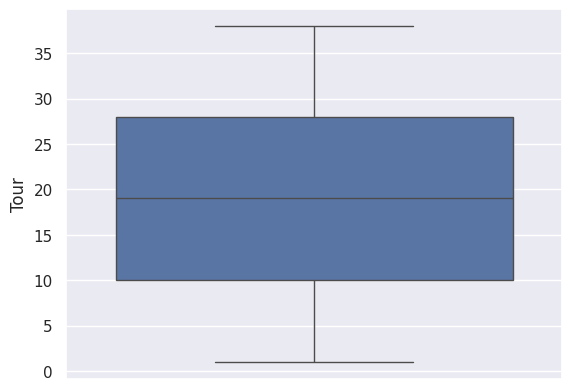

In [43]:
sns.boxplot(df["Tour"])

<AxesSubplot: ylabel='Attendance'>

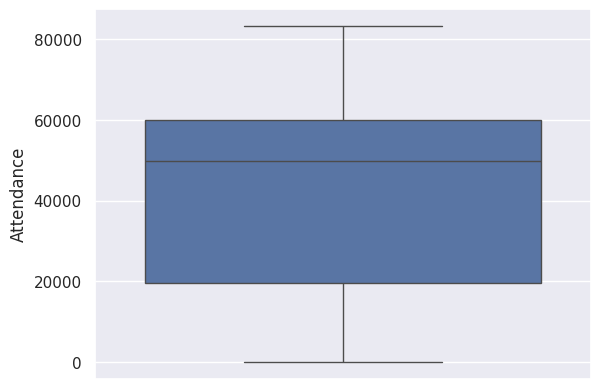

In [44]:
sns.boxplot(df["Attendance"])

<AxesSubplot: ylabel='Opponent_Position'>

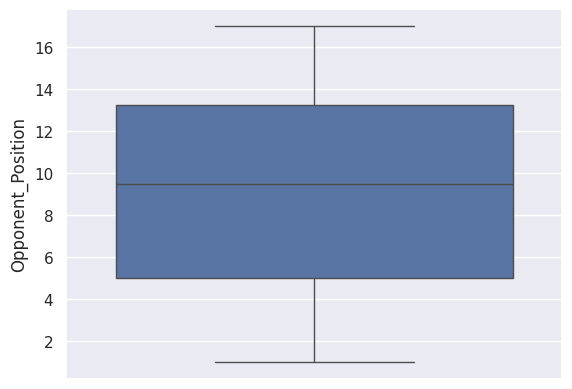

In [45]:
sns.boxplot(df["Opponent_Position"])

<AxesSubplot: ylabel='Opponent_Points'>

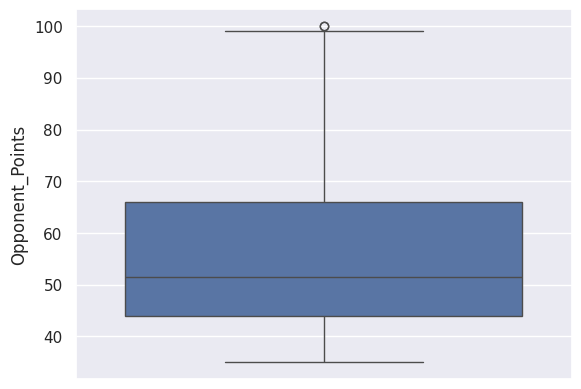

In [46]:
sns.boxplot(df["Opponent_Points"])

<AxesSubplot: ylabel='Arsenal_Position'>

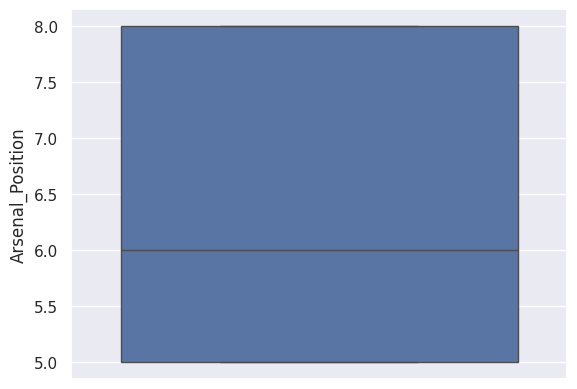

In [47]:
sns.boxplot(df["Arsenal_Position"])

<AxesSubplot: ylabel='Arsenal_Points'>

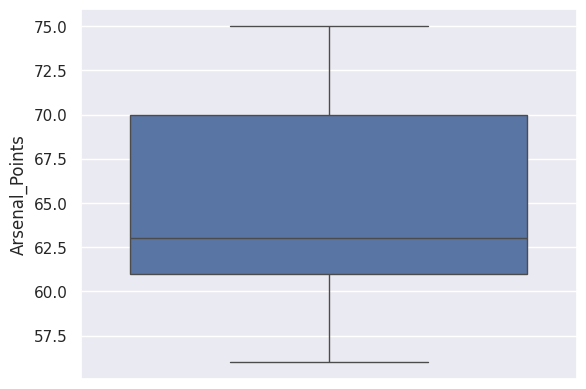

In [48]:
sns.boxplot(df["Arsenal_Points"])

There's no missing value in our final DataFrame.

### 4. Preliminary Analysis

By visualizing each of our explanatory variables with our response variable, "Result", we can determine which explanatory variables have the strongest association with the result of the match. Because the result is a categorical variable, we use boxplots when determining the association with a numerical variable, such as "Tour", with a boxplot and use barplots to check the Result's association with another categorical variable, such as "Time." Numerical explanatory variables that have a stronger association with "Result" will have boxplots that overlap less, and categorical explanatory variables that have a strong association with "Result" will have bars of different heights for each of their values.

Text(0.5, 1.0, 'Tour vs. Result')

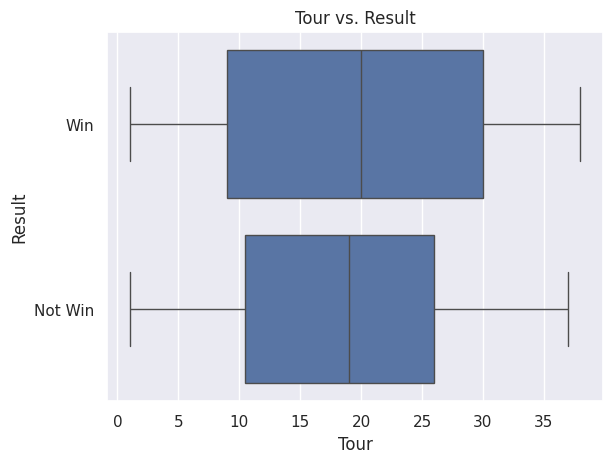

In [49]:
sns.boxplot(x = "Tour", y = "Result", data = df)
plt.title("Tour vs. Result")

Text(0.5, 1.0, 'Frequencies of Result by Time')

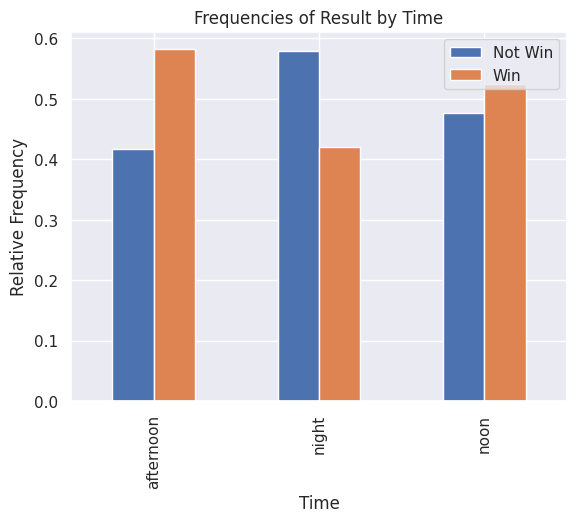

In [50]:
time_result = pd.crosstab(df["Time"], df["Result"], normalize = "index")
time_result.plot.bar()
plt.legend(loc = "upper right")
plt.ylabel("Relative Frequency")
plt.title("Frequencies of Result by Time")

Text(0.5, 1.0, 'Frequencies of Result by Home/Away')

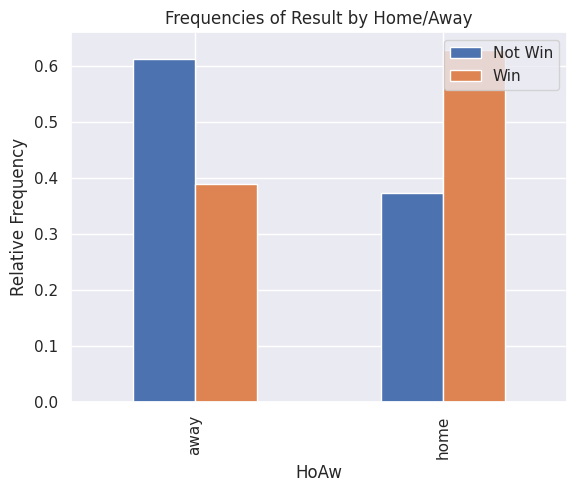

In [51]:
hoaw_result = pd.crosstab(df["HoAw"], df["Result"], normalize = "index")
hoaw_result.plot.bar()
plt.legend(loc = "upper right")
plt.ylabel("Relative Frequency")
plt.title("Frequencies of Result by Home/Away")

Text(0.5, 1.0, 'Attendance vs. Result')

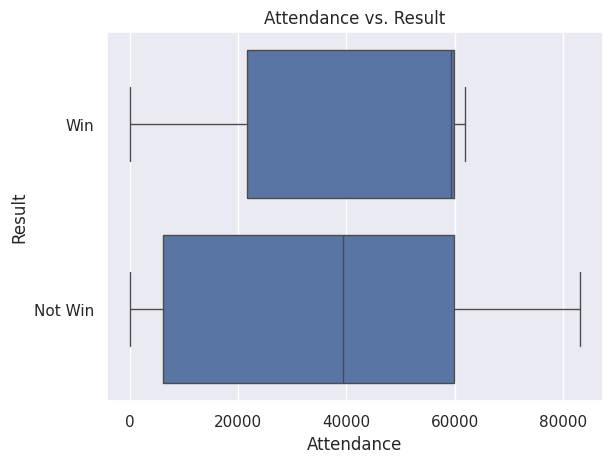

In [52]:
sns.boxplot(x = "Attendance", y = "Result", data = df)
plt.title("Attendance vs. Result")

Text(0.5, 1.0, 'Frequencies of Result by Coach')

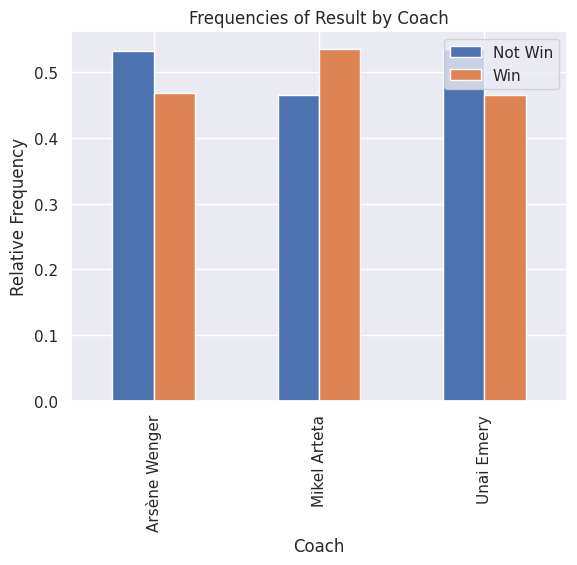

In [53]:
coach_result = pd.crosstab(df["Coach"], df["Result"], normalize = "index")
coach_result.plot.bar()
plt.legend(loc = "upper right")
plt.ylabel("Relative Frequency")
plt.title("Frequencies of Result by Coach")

Text(0.5, 1.0, 'Opponent_Position vs. Result')

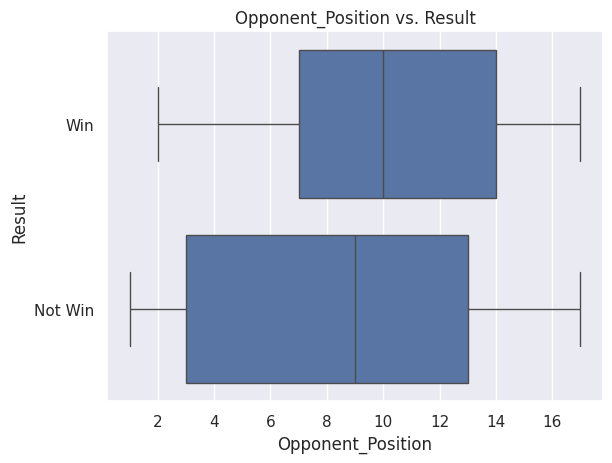

In [54]:
sns.boxplot(x = "Opponent_Position", y = "Result", data = df)
plt.title("Opponent_Position vs. Result")

Text(0.5, 1.0, 'Opponent_Points vs. Result')

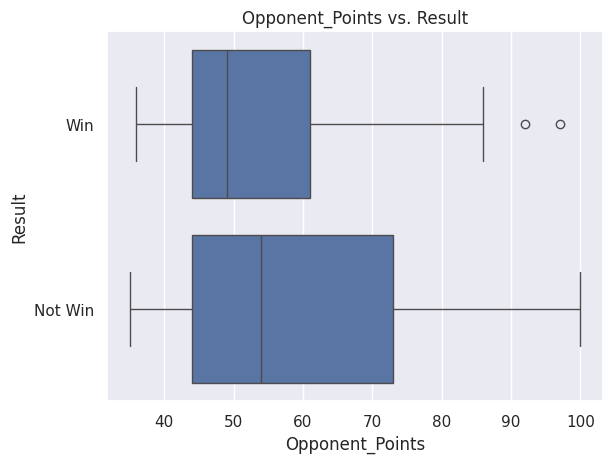

In [55]:
sns.boxplot(x = "Opponent_Points", y = "Result", data = df)
plt.title("Opponent_Points vs. Result")

Text(0.5, 1.0, 'Arsenal_Position vs. Result')

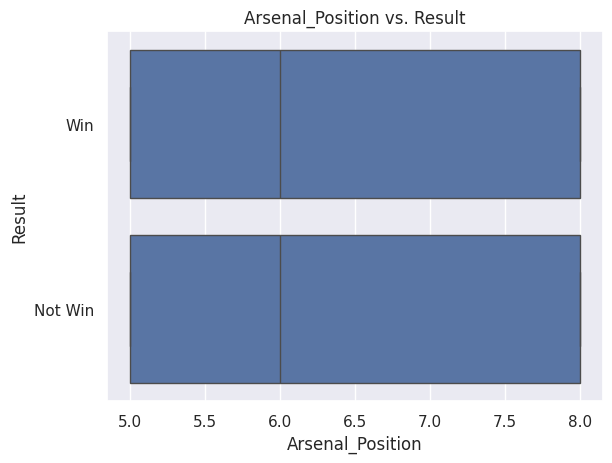

In [56]:
sns.boxplot(x = "Arsenal_Position", y = "Result", data = df)
plt.title("Arsenal_Position vs. Result")

Because "Arsenal_Position" only has 3 different values and its boxplot with "Result" is conclusive, I chose to build a barplot to better display their relationship, though their association is still weak.

Text(0.5, 1.0, 'Frequencies of Result by Arsenal_Position')

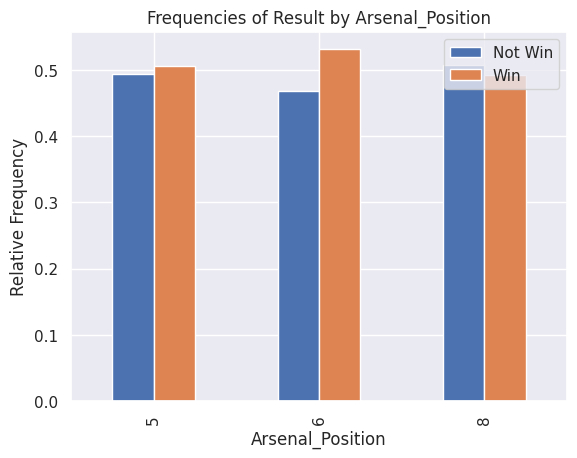

In [57]:
#sns.boxplot(x = "Arsenal_Position", y = "Result", data = df)
arsenalpos_result = pd.crosstab(df["Arsenal_Position"], df["Result"], normalize = "index")
arsenalpos_result.plot.bar()
plt.legend(loc = "upper right")
plt.ylabel("Relative Frequency")
plt.title("Frequencies of Result by Arsenal_Position")

Text(0.5, 1.0, 'Arsenal_Points vs. Result')

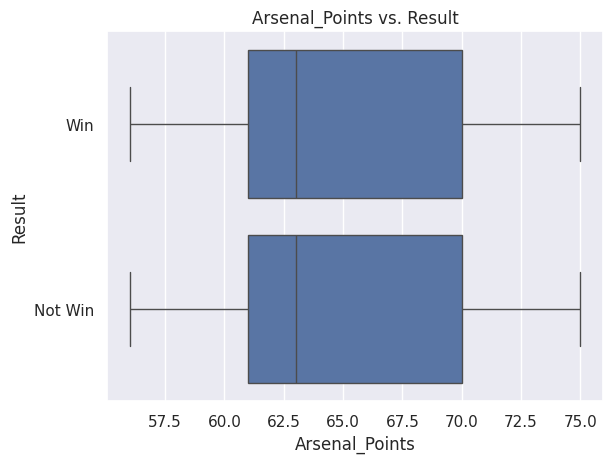

In [58]:
sns.boxplot(x = "Arsenal_Points", y = "Result", data = df)
plt.title("Arsenal_Points vs. Result")

After visualizing each relationship, we observe that there is a pattern based on the type of explanatory variable being graphed and its association with "Result." Every categorical variable except "Arsenal_Position" showed significant differences in its bar heights for each value. As for the numerical explanatory variables, only "Opponent_Position" displayed boxplots that didn't overlap, albeit still didn't show a strong association with "Result." In summary:

- "Time," "HoAw," "Coach," and "Opponent_Position" showed a relatively strong association with "Result."

- "Arsenal_Position," "Tour," "Attendance", "Opponent_Points," and "Arsenal_Points" showed a relatively weak association with "Result."

Multicollinearity can be an issue when training models; pairs of explanatory variables can lead to data scientists falsely concluding that these variables would bring strong predictive power to their model. To prevent this from happening, we visualized the relationship between each numerical explanatory variable with both a pairplot and a heatmap.

In [59]:
df_num = df[['Tour', 'Attendance','Opponent_Position','Opponent_Points','Arsenal_Position','Arsenal_Points']]
df_num.corr()

,Tour,Attendance,Opponent_Position,Opponent_Points,Arsenal_Position,Arsenal_Points
Tour,1.000000,-0.115311,0.079425,-0.091935,0.077876,-0.059736
Attendance,-0.115311,1.000000,-0.153394,0.136596,-0.355069,0.432925
Opponent_Position,0.079425,-0.153394,1.000000,-0.924585,-0.004884,0.009124
Opponent_Points,-0.091935,0.136596,-0.924585,1.000000,0.004107,0.001197
Arsenal_Position,0.077876,-0.355069,-0.004884,0.004107,1.000000,-0.896633
Arsenal_Points,-0.059736,0.432925,0.009124,0.001197,-0.896633,1.000000


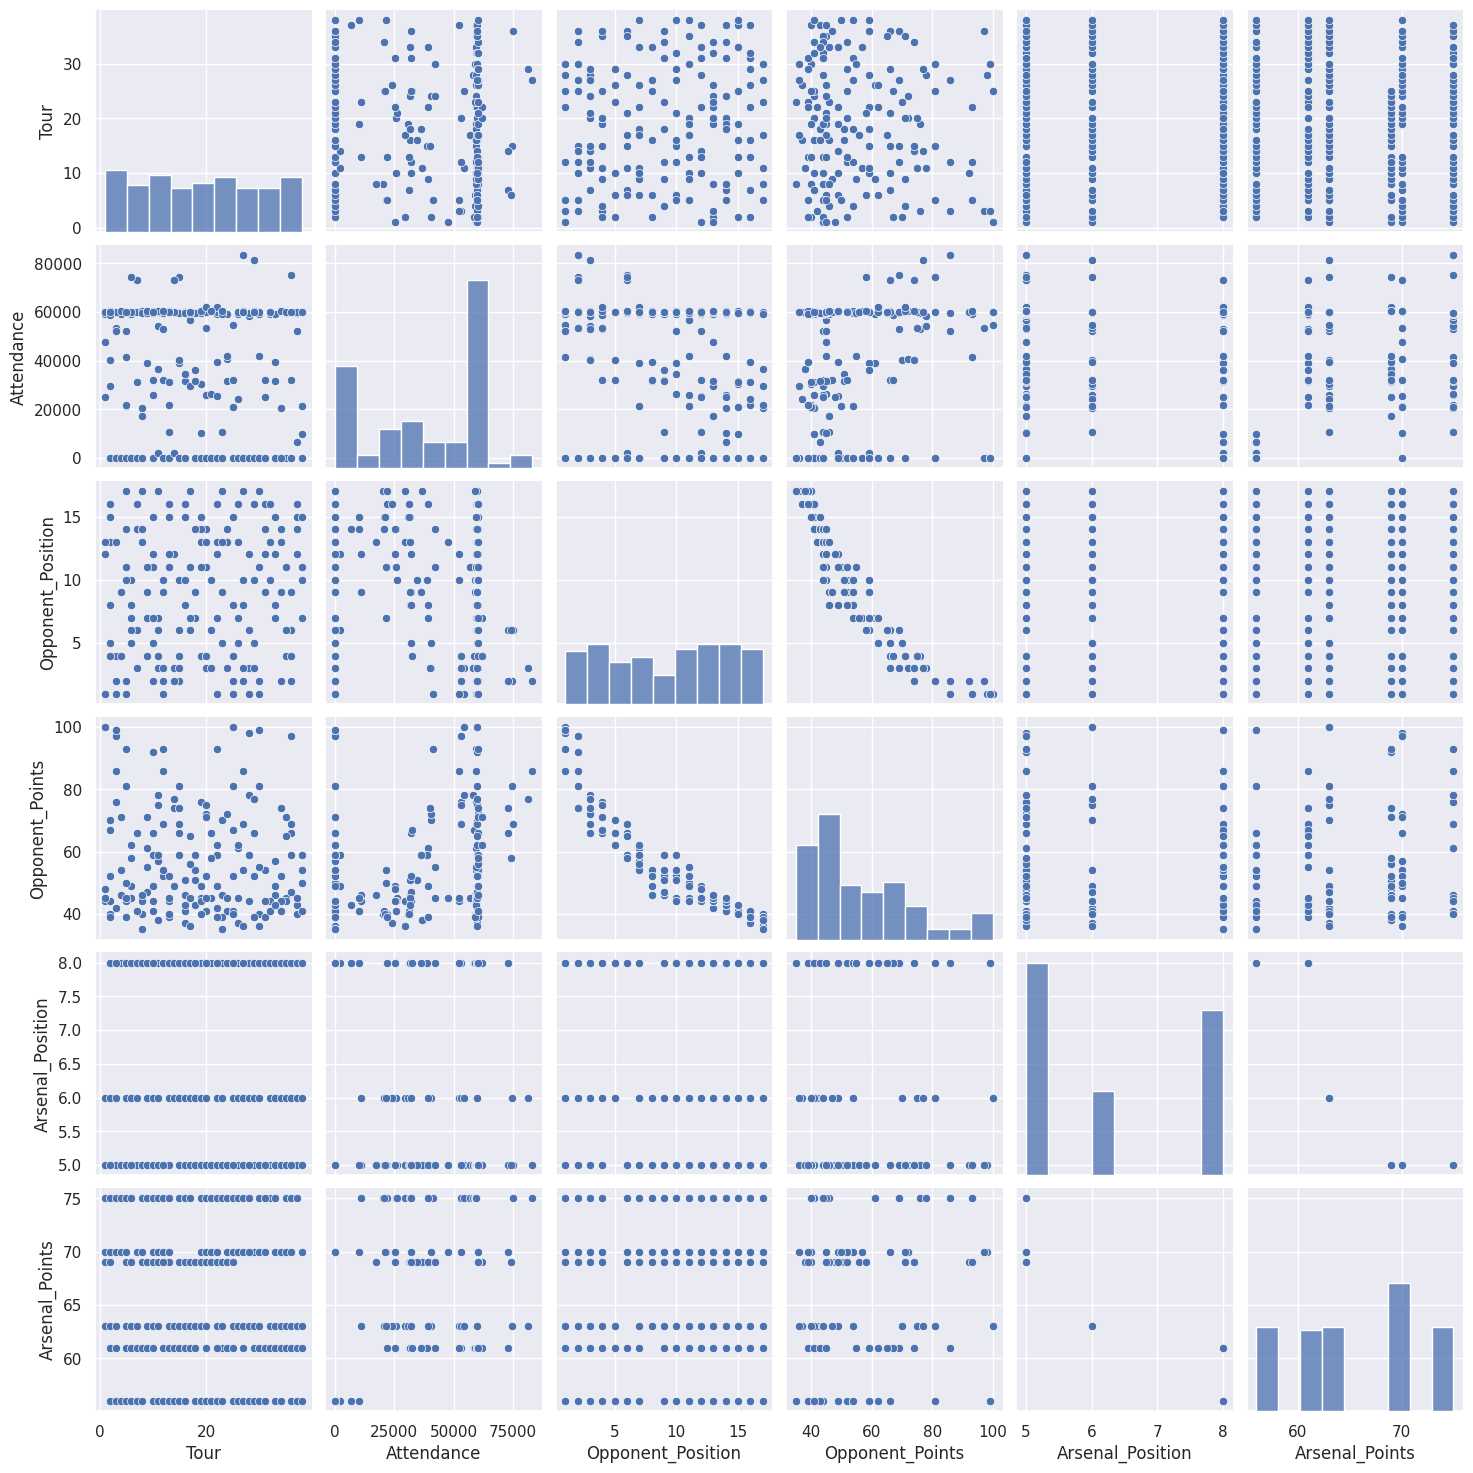

In [60]:
sns.pairplot(df_num)
plt.show()

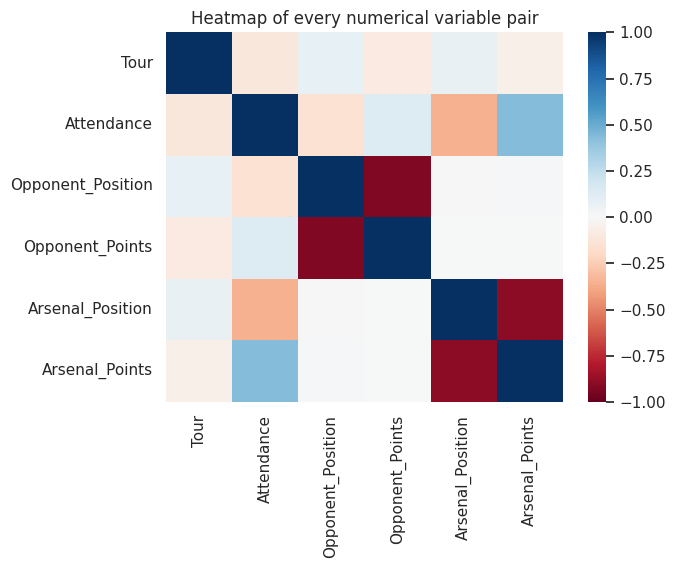

In [61]:
sns.heatmap(df_num.corr(), vmin = -1, vmax = 1, cmap = 'RdBu')
plt.title("Heatmap of every numerical variable pair")
plt.show()

By calling the .corr(), .pairplot(), and .heatmap() functions, we can conclude that the two numerical-numerical collinear pairs that exist in our dataset are (Opponent_Position, Opponent_Points) and (Arsenal_Position, Arsenal_Points). This makes sense as the number of points a team scores likely contributes to their position. However, if we were to keep both variables in each pair in our logistic regression model, we might falsely assume the amount of predictive power each of these variables has.

By listing every categorical and numerical explanatory variable in separate lists and using a for loop, we can also visualize the relationship between each categorical-numerical variable pair. The graphs below will be interpreted later on to see which variables overfit our model.

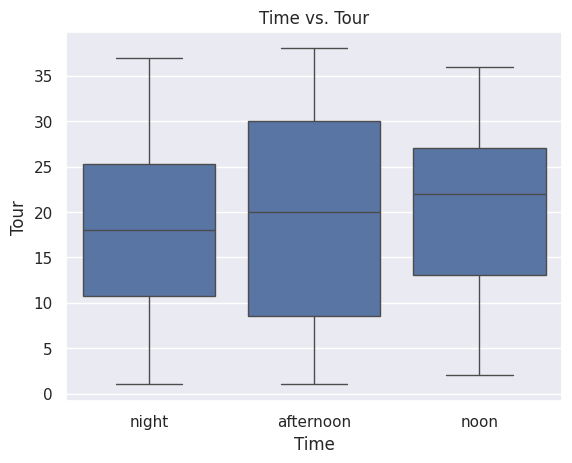

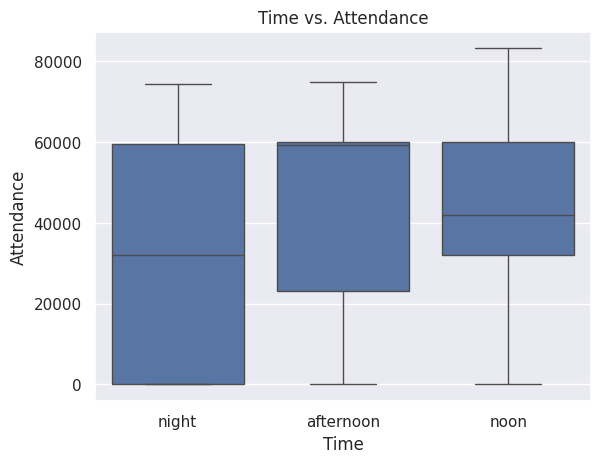

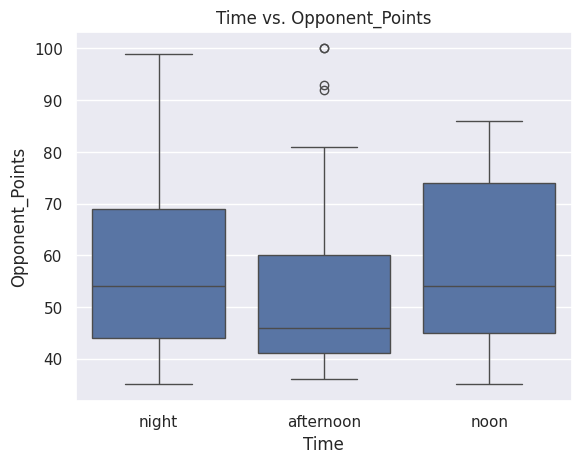

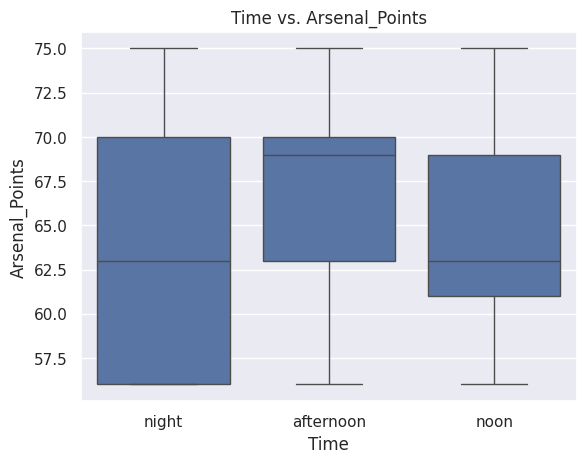

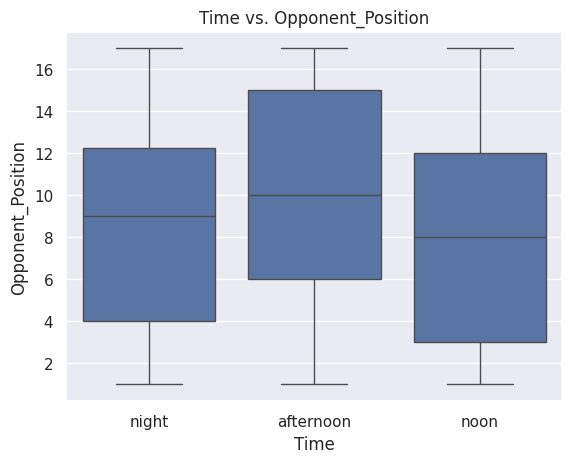

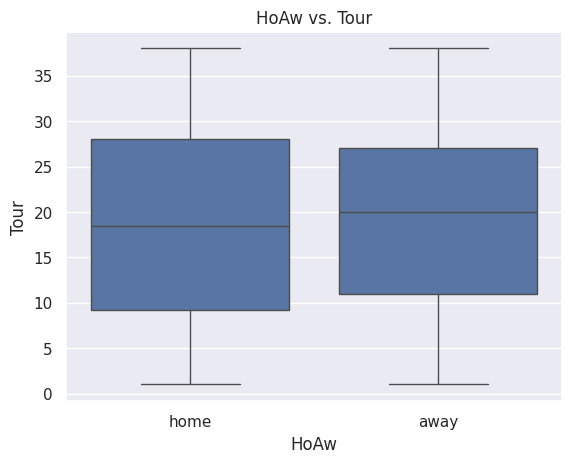

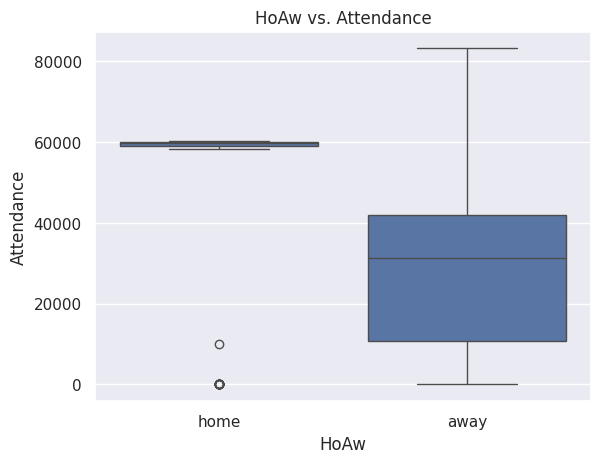

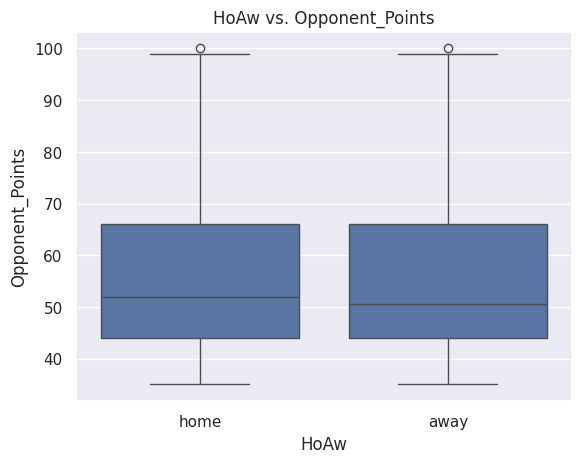

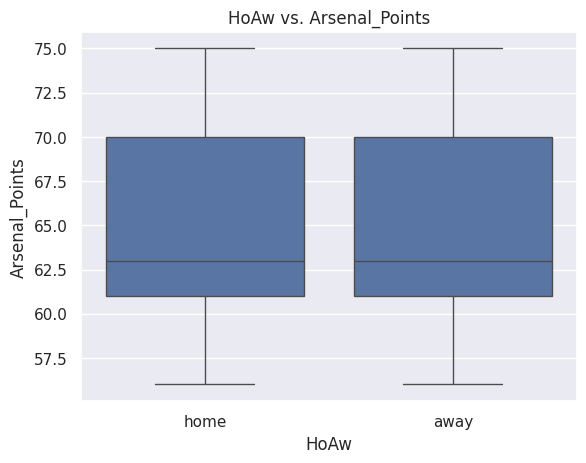

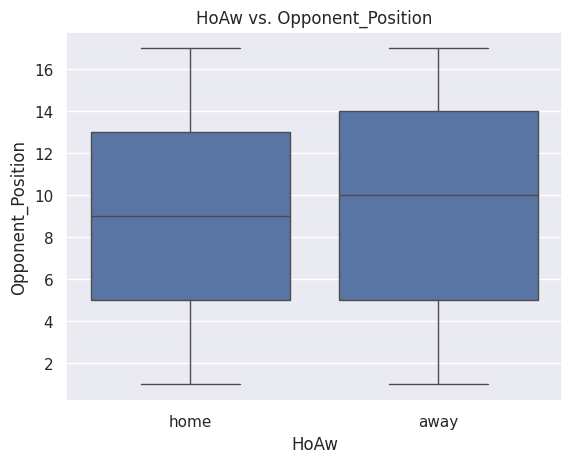

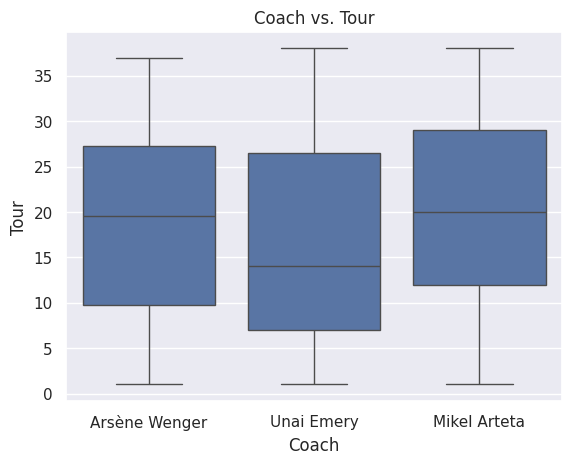

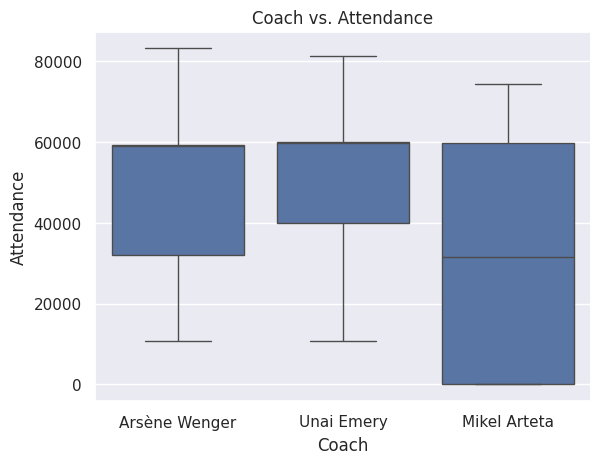

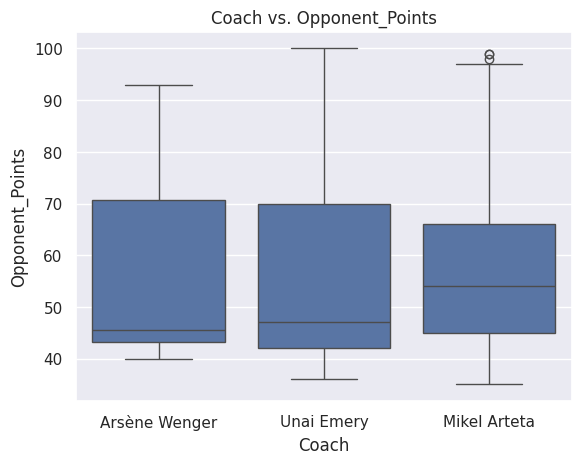

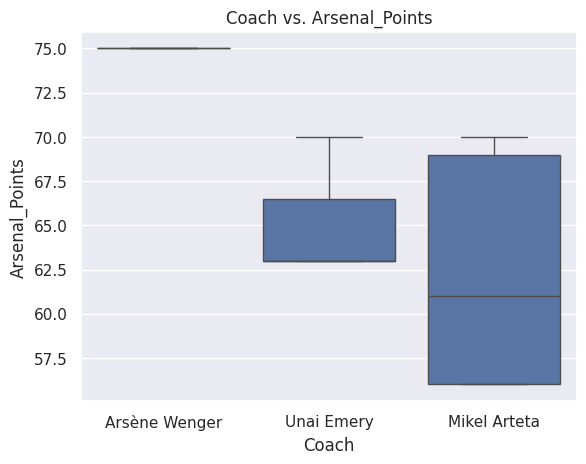

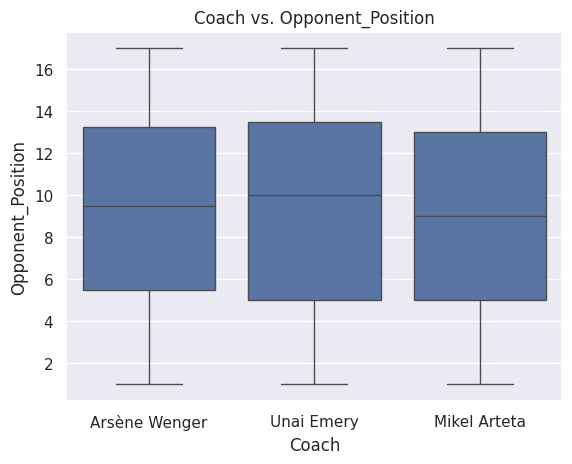

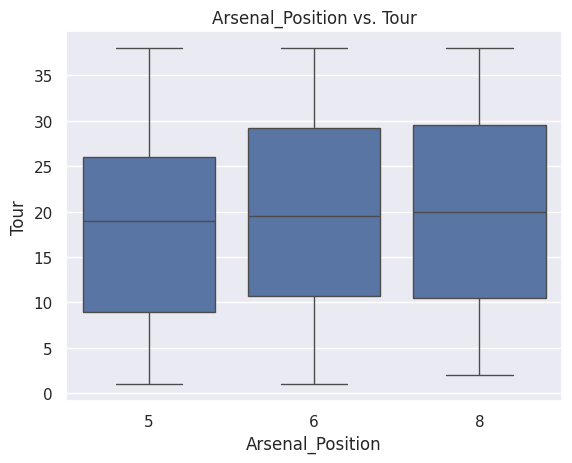

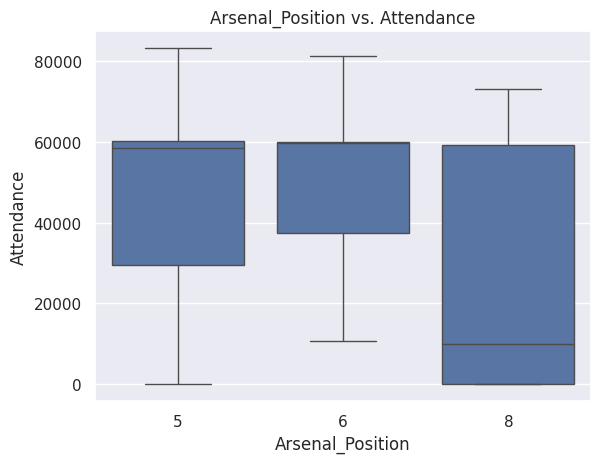

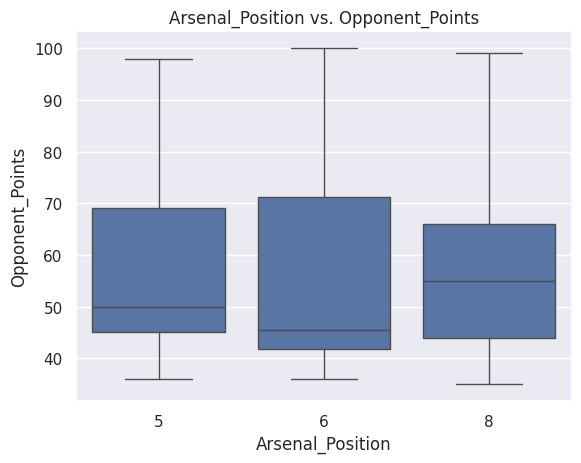

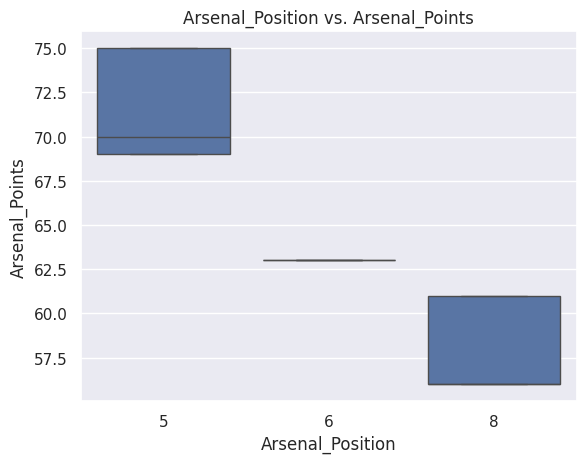

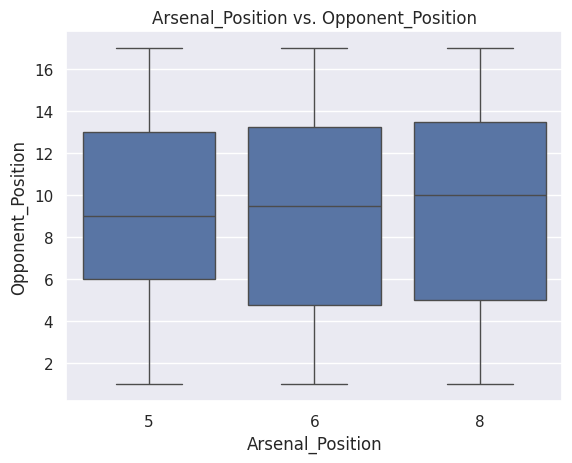

In [62]:
cat_vars = ["Time", "HoAw", "Coach", "Arsenal_Position"]
num_vars = ["Tour", "Attendance", "Opponent_Points", "Arsenal_Points", "Opponent_Position"]

for cat_var in cat_vars:
    for num_var in num_vars:
        plt.figure()
        sns.boxplot(x = cat_var, y = num_var, data = df)
        plt.title(cat_var + " vs. " + num_var)

A numerical and categorical can interact in how they impact the probability that "Result" is a win. If these two variables have a strong interaction, we can incorporate interaction terms into our logistic regression model to better reflect the relationship between the two variables and our response variable. To do this, we turned "Result" into a 0/1 response variable. Then, we created a scatterplot to visualize the relationship between our numerical explanatory variable and "Result" in a 0/1 response variable form by the categorical explanatory variable. If the slopes are significantly different for each value of the categorical explanatory variable, interaction exists between our two explanatory variables.

Text(0.5, 1.0, 'Interaction b/w Tour and Time')

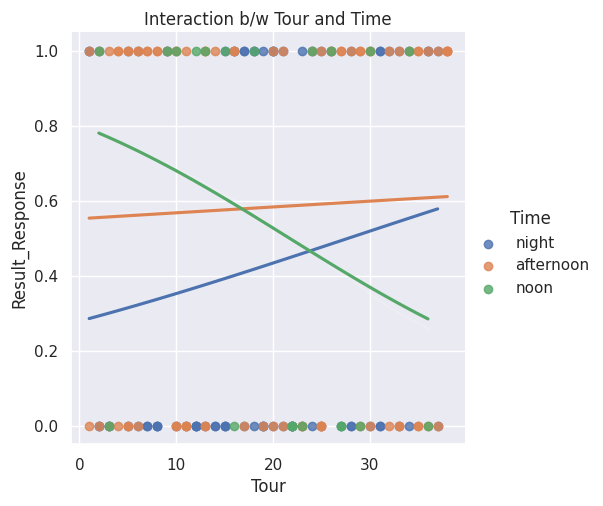

In [63]:
df["Result_Response"] = df["Result"].replace({"Win": 1, "Not Win": 0})
sns.lmplot(x = "Tour", y = "Result_Response", hue = "Time", data = df, logistic = True, ci = False)
plt.title("Interaction b/w Tour and Time")

Text(0.5, 1.0, 'Interaction b/w Tour and HoAw')

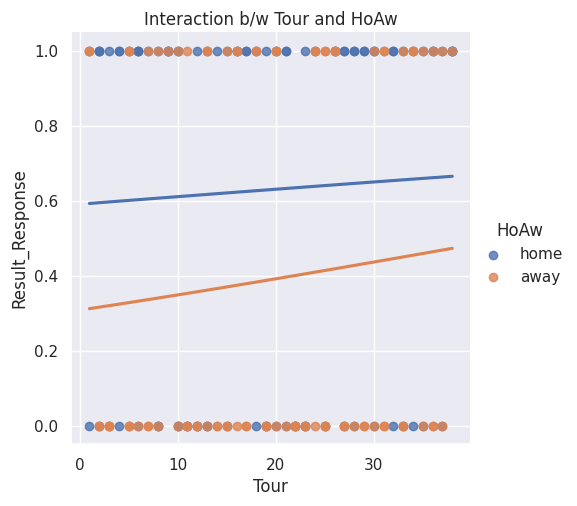

In [64]:
sns.lmplot(x = "Tour", y = "Result_Response", hue = "HoAw", data = df, logistic = True, ci = False)
plt.title("Interaction b/w Tour and HoAw")

Text(0.5, 1.0, 'Interaction b/w Tour and Coach')

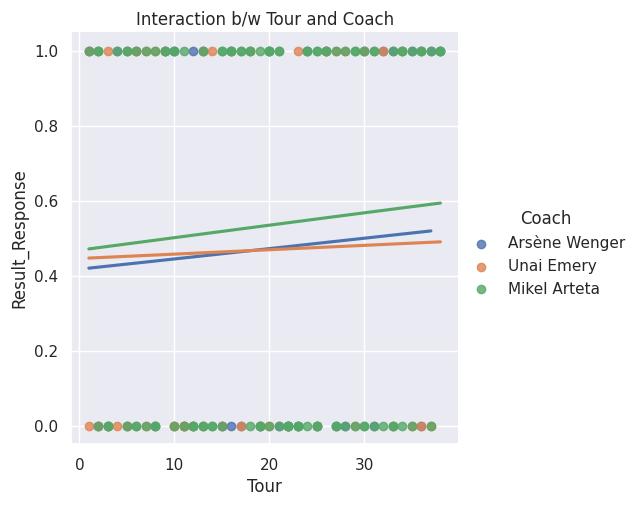

In [65]:
sns.lmplot(x = "Tour", y = "Result_Response", hue = "Coach", data = df, logistic = True, ci = False)
plt.title("Interaction b/w Tour and Coach")

Text(0.5, 1.0, 'Interaction b/w Attendance and Time')

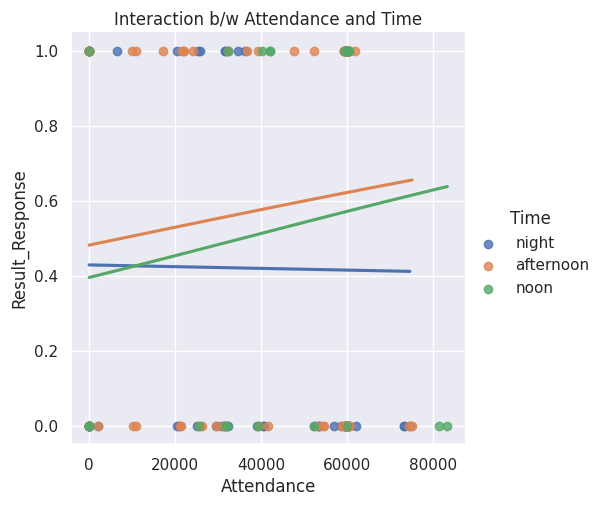

In [66]:
sns.lmplot(x = "Attendance", y = "Result_Response", hue = "Time", data = df, logistic = True, ci = False)
plt.title("Interaction b/w Attendance and Time")

Text(0.5, 1.0, 'Interaction b/w Attendance and HoAw')

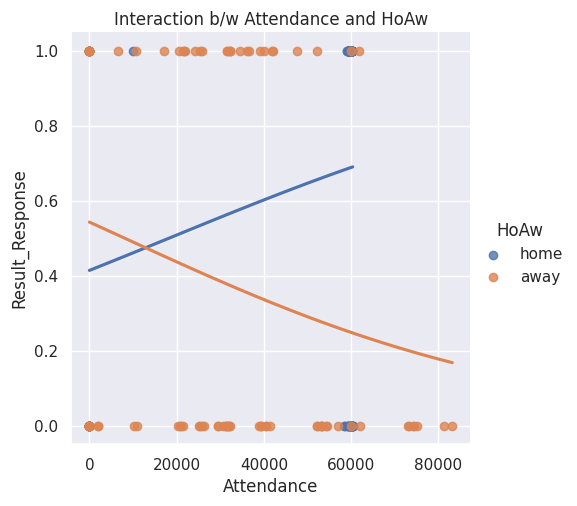

In [67]:
sns.lmplot(x = "Attendance", y = "Result_Response", hue = "HoAw", data = df, logistic = True, ci = False)
plt.title("Interaction b/w Attendance and HoAw")

Text(0.5, 1.0, 'Interaction b/w Attendance and Coach')

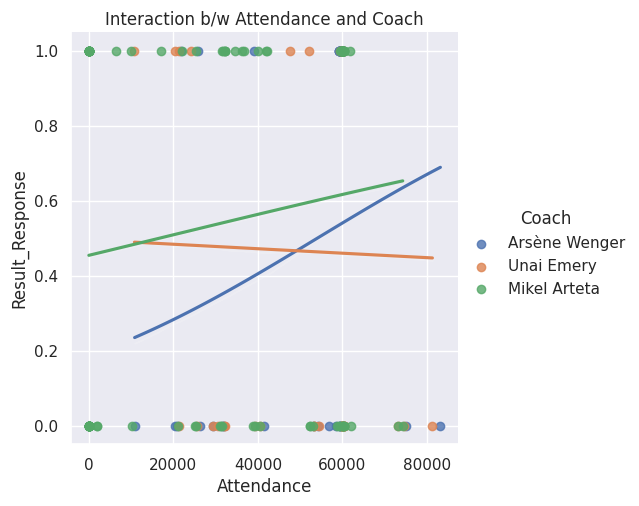

In [68]:
sns.lmplot(x = "Attendance", y = "Result_Response", hue = "Coach", data = df, logistic = True, ci = False)
plt.title("Interaction b/w Attendance and Coach")

Text(0.5, 1.0, 'Interaction b/w Opponent_Points and Time')

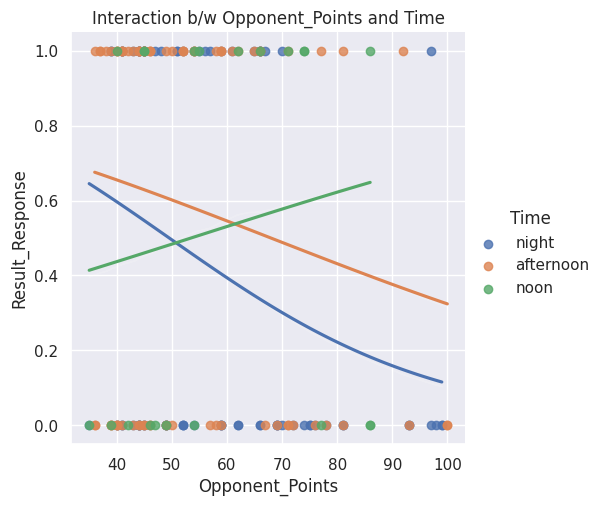

In [69]:
sns.lmplot(x = "Opponent_Points", y = "Result_Response", hue = "Time", data = df, logistic = True, ci = False)
plt.title("Interaction b/w Opponent_Points and Time")

Text(0.5, 1.0, 'Interaction b/w Opponent_Points and HoAw')

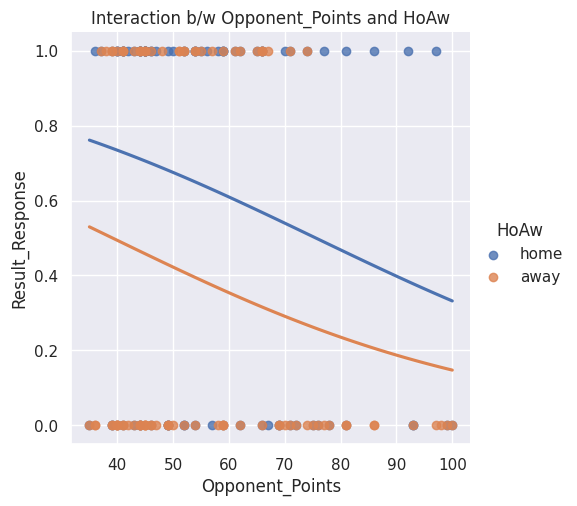

In [70]:
sns.lmplot(x = "Opponent_Points", y = "Result_Response", hue = "HoAw", data = df, logistic = True, ci = False)
plt.title("Interaction b/w Opponent_Points and HoAw")

Text(0.5, 1.0, 'Interaction b/w Opponent_Points and Coach')

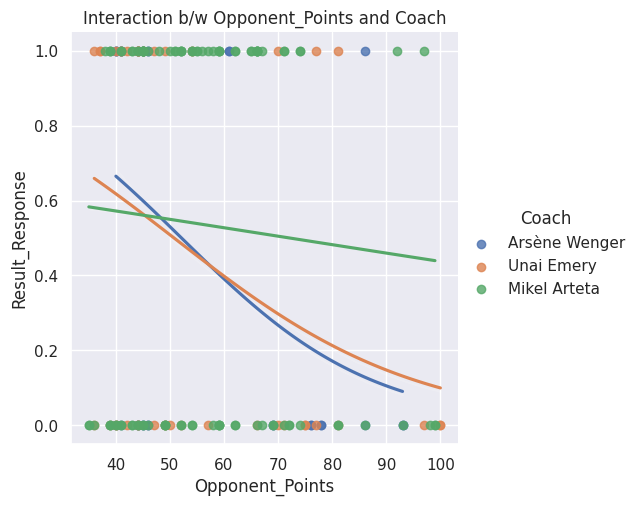

In [71]:
sns.lmplot(x = "Opponent_Points", y = "Result_Response", hue = "Coach", data = df, logistic = True, ci = False)
plt.title("Interaction b/w Opponent_Points and Coach")

Text(0.5, 1.0, 'Interaction b/w Arsenal_Points and Time')

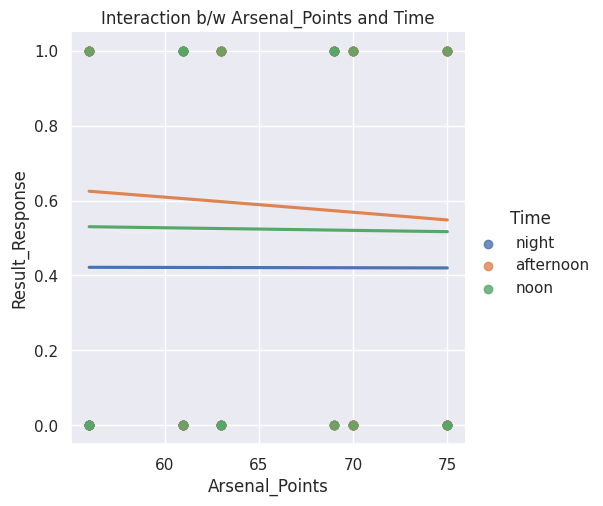

In [72]:
sns.lmplot(x = "Arsenal_Points", y = "Result_Response", hue = "Time", data = df, logistic = True, ci = False)
plt.title("Interaction b/w Arsenal_Points and Time")

Text(0.5, 1.0, 'Interaction b/w Arsenal_Points and HoAw')

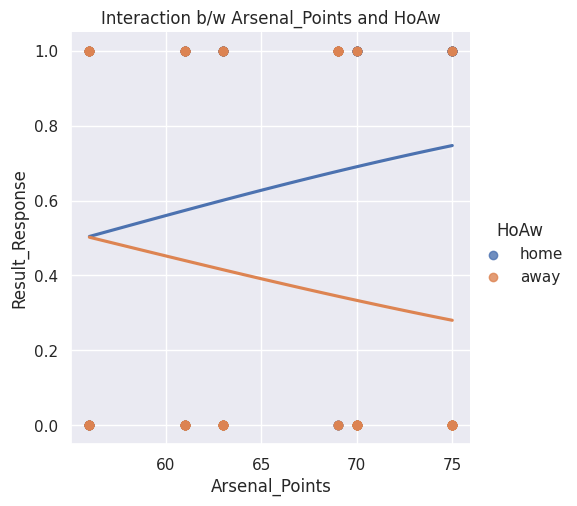

In [73]:
sns.lmplot(x = "Arsenal_Points", y = "Result_Response", hue = "HoAw", data = df, logistic = True, ci = False)
plt.title("Interaction b/w Arsenal_Points and HoAw")

Text(0.5, 1.0, 'Interaction b/w Arsenal_Points and Coach')

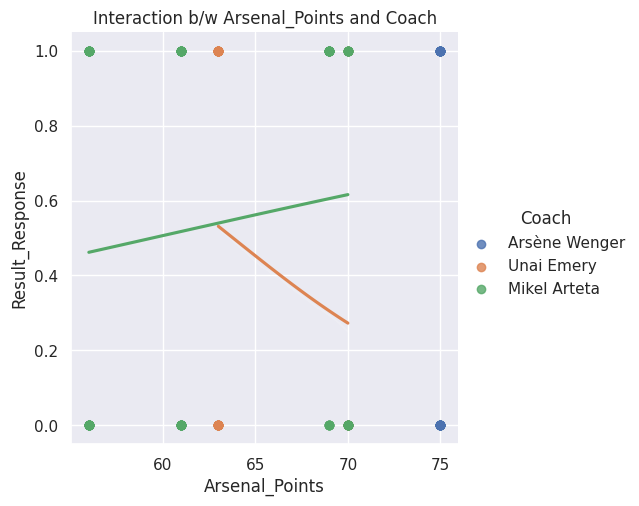

In [74]:
sns.lmplot(x = "Arsenal_Points", y = "Result_Response", hue = "Coach", data = df, logistic = True, ci = False)
plt.title("Interaction b/w Arsenal_Points and Coach")

After plotting the best-fit logistic regression curves, we see that there are several numerical and categorical explanatory variable pairs that interact and impact the predicted probability that "Result" is a win. Interaction terms we can include in our logistic regression model are ("Tour", "Time"), ("Attendance", "Time"), ("Attendance", "HoAw"), ("Attendance", "Coach"), ("Arsenal_Points", "HoAw"), and ("Arsenal_Points", "Coach").

# 5. Model Data Preprocessing

In [75]:
df1 = df[['Tour','Time', 'HoAw', 'Attendance','Coach', 'Opponent_Position','Opponent_Points','Arsenal_Position','Arsenal_Points','Result_Response']]
df1.head()

,Tour,Time,HoAw,Attendance,Coach,Opponent_Position,Opponent_Points,Arsenal_Position,Arsenal_Points,Result_Response
0,1,night,home,59387,Arsène Wenger,12.0,44.0,5,75,1
1,2,night,away,29459,Arsène Wenger,13.0,44.0,5,75,0
2,3,afternoon,away,53206,Arsène Wenger,4.0,76.0,5,75,0
3,4,afternoon,home,59262,Arsène Wenger,9.0,46.0,5,75,1
4,5,afternoon,away,41478,Arsène Wenger,1.0,93.0,5,75,0


In [76]:
y = df1["Result_Response"]
y.head()

0    1
1    0
2    0
3    1
4    0
Name: Result_Response, dtype: int64

In [77]:
x = df1.drop(['Result_Response'], axis = 1)
x.head()

,Tour,Time,HoAw,Attendance,Coach,Opponent_Position,Opponent_Points,Arsenal_Position,Arsenal_Points
0,1,night,home,59387,Arsène Wenger,12.0,44.0,5,75
1,2,night,away,29459,Arsène Wenger,13.0,44.0,5,75
2,3,afternoon,away,53206,Arsène Wenger,4.0,76.0,5,75
3,4,afternoon,home,59262,Arsène Wenger,9.0,46.0,5,75
4,5,afternoon,away,41478,Arsène Wenger,1.0,93.0,5,75


In [78]:
scaler_training = StandardScaler()
x_num = ['Tour','Attendance', 'Opponent_Position','Opponent_Points','Arsenal_Position','Arsenal_Points']

x[x_num] = scaler_training.fit_transform(x[x_num])
x.head()

,Tour,Time,HoAw,Attendance,Coach,Opponent_Position,Opponent_Points,Arsenal_Position,Arsenal_Points
0,-1.666853,night,home,0.836405,Arsène Wenger,0.565907,-0.742461,-0.929072,1.480044
1,-1.574337,night,away,-0.359903,Arsène Wenger,0.769172,-0.742461,-0.929072,1.480044
2,-1.481822,afternoon,away,0.589333,Arsène Wenger,-1.060210,1.205160,-0.929072,1.480044
3,-1.389307,afternoon,home,0.831409,Arsène Wenger,-0.043887,-0.620735,-0.929072,1.480044
4,-1.296791,afternoon,away,0.120531,Arsène Wenger,-1.670004,2.239833,-0.929072,1.480044


In [79]:
df_cat = x[['Time', 'HoAw','Coach']]
df_cat = pd.get_dummies(df_cat,drop_first=True, dtype = int)
df_cat.head()


,Time_night,Time_noon,HoAw_home,Coach_Mikel Arteta,Coach_Unai Emery
0,1,0,1,0,0
1,1,0,0,0,0
2,0,0,0,0,0
3,0,0,1,0,0
4,0,0,0,0,0


In [80]:
x_sum = x.drop(['Time','HoAw','Coach'], axis=1)
x = pd.concat([x_sum, df_cat], axis=1)
x.head()

,Tour,Attendance,Opponent_Position,Opponent_Points,Arsenal_Position,Arsenal_Points,Time_night,Time_noon,HoAw_home,Coach_Mikel Arteta,Coach_Unai Emery
0,-1.666853,0.836405,0.565907,-0.742461,-0.929072,1.480044,1,0,1,0,0
1,-1.574337,-0.359903,0.769172,-0.742461,-0.929072,1.480044,1,0,0,0,0
2,-1.481822,0.589333,-1.060210,1.205160,-0.929072,1.480044,0,0,0,0,0
3,-1.389307,0.831409,-0.043887,-0.620735,-0.929072,1.480044,0,0,1,0,0
4,-1.296791,0.120531,-1.670004,2.239833,-0.929072,1.480044,0,0,0,0,0


We changed the categorical variables to numerical interaction terms. After that, we created a feature matrix and target array. We then scaled the feature matrix.

## 6. Feature Selection With K-Fold Cross-Validation

We will build our Logistic model for our primary research goal of selecting the best predictive probability of winning on the side of Arsenal. We will conduct both non-regularization and regularization (Lasso, Ridge, and ElasticNet) models with cross-validation to boost the performance of these models for the new dataset, and we will compare and select the highest mean AUC (Area Under Curve) score, presenting the best model's performance. AUC is the measure of how close the ROC curve gets to the ideal classification, with AUC = 1, so we want to choose the model with the AUC score closest to 1.  

Let's build the non-regularized logistic regression model using the cross-validation of k=5 with the training feature matrix and target array above.

### 6.1. Non-Regularized Logistic Regression Model

In [81]:
log = LogisticRegression()

mod_nonreg = LogisticRegression(penalty = "none",
                                solver="newton-cg",
                                max_iter = 1000)

mod_nogreg = log.fit(x, y)
mod_nogreg


LogisticRegression()

In [82]:
cross_val = KFold(n_splits=5, shuffle = True, random_state=207)

test_mod_log = cross_val_score(mod_nogreg, x, y, cv=cross_val, scoring= "roc_auc")

print("Test Fold AUC score:", test_mod_log)
print("Mean Test Fold AUC score:", test_mod_log.mean())
print("Std Test Fold AUC score:", test_mod_log.std())

Test Fold AUC score: [0.58513932 0.65789474 0.75510204 0.70068027 0.58223684]
Mean Test Fold AUC score: 0.6562106421515976
Std Test Fold AUC score: 0.06675799424402115


The non-regularized model's mean AUC score is 0.6562. Now, let's explore the regularization models of Lasso, Ridge, and ElasticNet.

### 6.2 Lasso Logistic Regression Model

We will explore the Lasso Logistic Regression model using the same cross-validation using different Lambda values of 0 to 0.5. 

In [83]:
Lasso = []

for i in np.arange(0, 5.01, 0.01):
    mod_lasso = LogisticRegression("l1", solver="liblinear", max_iter=1000, C=1/i)
    mod_lasso.fit(x, y)

    Lasso.append([i, cross_val_score(mod_lasso, x, y, cv=cross_val, scoring="roc_auc").mean()])
df_lasso = pd.DataFrame(Lasso, columns=["Lambda", "Mean AUC"])
df_lasso

,Lambda,Mean AUC
0,0.00,0.500000
1,0.01,0.644872
2,0.02,0.645491
3,0.03,0.645491
4,0.04,0.645452
...,...,...
496,4.96,0.635618
497,4.97,0.636275
498,4.98,0.636275
499,4.99,0.636275


We will make a plot of Lasso model of mean AUC scores to identify its movement.

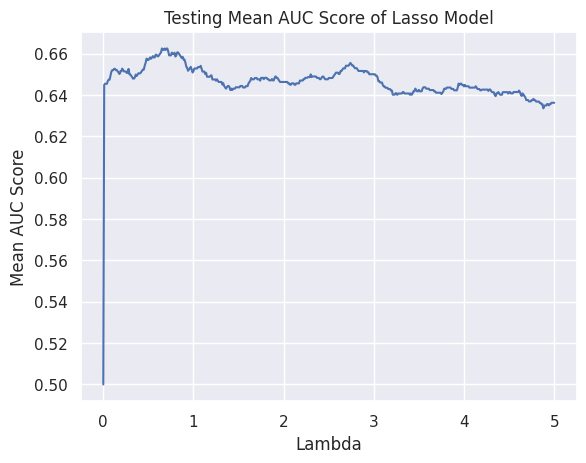

In [84]:
plt.plot(df_lasso["Lambda"], df_lasso["Mean AUC"])
plt.title("Testing Mean AUC Score of Lasso Model")
plt.ylabel("Mean AUC Score")
plt.xlabel("Lambda")
plt.show()

In [85]:
df_lasso.nlargest(1, "Mean AUC")

,Lambda,Mean AUC
65,0.65,0.662551


Using Lambda value of 0.65 has the highest in the Lasso model of 0.6626, and it is higher than the non-regularized model. We will keep the Lasso model as the best model so far. 

### 6.3 Ridge Logistic Regression Model

We will build the Ridge Logistic Regression model using the same cross-validation to select the best mean AUC score. We will use Lambda value 0.01 to 0.5. 

In [86]:
Ridge = []

for i in np.arange(0.01, 5.01, 0.01):
    mod_ridge = LogisticRegression("l2", solver="liblinear", max_iter=1000, C=1/i)
    mod_ridge = mod_ridge.fit(x, y)

    Ridge.append([i, cross_val_score(mod_ridge, x, y, cv=cross_val, scoring="roc_auc").mean()])

df_ridge = pd.DataFrame(Ridge, columns = ["Lambda", "Mean AUC"])
df_ridge

,Lambda,Mean AUC
0,0.01,0.644191
1,0.02,0.644191
2,0.03,0.643511
3,0.04,0.644191
4,0.05,0.644191
...,...,...
495,4.96,0.653911
496,4.97,0.653911
497,4.98,0.653231
498,4.99,0.653231


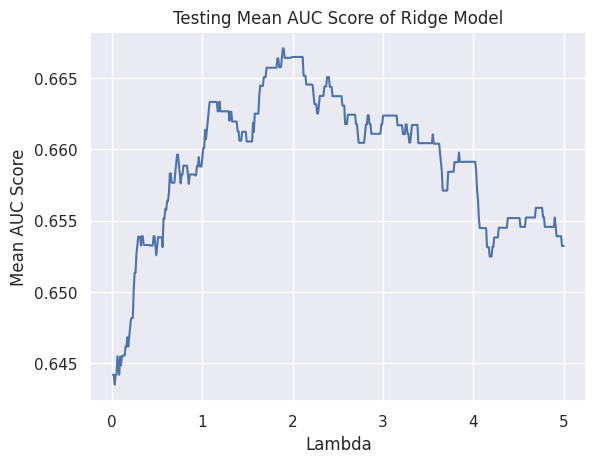

In [87]:
plt.plot(df_ridge["Lambda"], df_ridge["Mean AUC"])
plt.xlabel("Lambda")
plt.ylabel("Mean AUC Score")
plt.title("Testing Mean AUC Score of Ridge Model")
plt.show()

In [88]:
df_ridge.nlargest(1, "Mean AUC")

,Lambda,Mean AUC
188,1.89,0.667091


Using the Lambda of 1.89 has the highest mean AUC score in the Ridge model of 0.6671, and it is higher than the previous Lasso model. We will keep this Ridge model as the best performer in terms of mean AUC score.

### 6.4 Elastic Net Logistic Regression Model

We will build the last regularized model of Elastic Net, measuring the mean AUC score using the same cross-validation. We will measure it with Lambda value 0.01 to 0.5 and Alpha value of 0 to 1. If the Alpha value is close to 0, the Elastic Net performs similarly to Ridge, and if it is close to 1, it performs similarly to Lasso.  

In [89]:
Elastic = []

for i in np.arange(0, 1.1, 0.1):
    for j in np.arange(0.01, 5.01, 0.01):
        mod_elastic = LogisticRegression("elasticnet", solver="saga", max_iter=1000, l1_ratio=i, C=1/j)
        mod_elastic.fit(x, y)

        Elastic.append([i, j, cross_val_score(mod_elastic, x, y, cv=cross_val, scoring="roc_auc").mean()])

df_elastic = pd.DataFrame(Elastic, columns = ["Alpha", "Lambda", "Mean AUC"])
df_elastic
        

,Alpha,Lambda,Mean AUC
0,0.0,0.01,0.643533
1,0.0,0.02,0.644191
2,0.0,0.03,0.644191
3,0.0,0.04,0.644191
4,0.0,0.05,0.644872
...,...,...,...
5495,1.0,4.96,0.608351
5496,1.0,4.97,0.608351
5497,1.0,4.98,0.608351
5498,1.0,4.99,0.608351


In [90]:
df_elastic.nlargest(1, "Mean AUC")

,Alpha,Lambda,Mean AUC
4567,0.9,0.68,0.672477


Using Lambda value of 0.68 and Alpha value of 0.9, ElasticNet was the best with a 0.67 mean AUC score, performing similar to the Lasso model. It is the best model that is higher than the previous Ridge best model, and we will finalize with this ElasticNet model.

# 7. Best Model Discussion

We will discuss our best model of ElasticNet. 

### 7.1. Train-Test Split

Split the model into x_train, x_test, y_train, and y_test using our feature matrix and target array.

In [91]:
x_train, x_test, y_train ,y_test = train_test_split(x, y, test_size=0.2, random_state=207)

Let's train our best Elastic model using the Alpha value 0.9 and Lambda value 0.68.

### 7.2. Fitting the Logistic Model

In [92]:
final_mod = LogisticRegression("elasticnet", solver="saga", max_iter=1000,
                               l1_ratio=0.9, C=1/0.68)
final_mod.fit(x_train, y_train)

LogisticRegression(C=1.4705882352941175, l1_ratio=0.9, max_iter=1000,
                   penalty='elasticnet', solver='saga')

### 7.3. Equation

Let's identify the equation of our best Logistic model by interpreting the slopes of explanatory variables. We will present the slopes of ElasticNet, checking the penalized slopes that bring less predictive power to the model. 

In [93]:

df_coef = pd.DataFrame(final_mod.coef_.T,
             columns=["Final Model Slopes"],
             index=x_train.columns)

print(final_mod.intercept_)
df_coef


[-0.77927543]


,Final Model Slopes
Tour,0.038565
Attendance,0.179896
Opponent_Position,-0.571285
Opponent_Points,-0.973082
Arsenal_Position,-0.171517
Arsenal_Points,-0.111382
Time_night,-0.308347
Time_noon,0.000000
HoAw_home,1.066289
Coach_Mikel Arteta,0.674869


As we found the intercept and slopes, we can use our equation for the best Logistic regression model that predicts the probability of Arsenal winning the game. Let's build the equation of predictive probability of winning Arsenal, predicted Odds, and predicted Log-Odds in terms of the success level of Arsenal winning the game (Y=1).

 - $P(\hat{Y}=1) = \hat{p} =\frac{1}{(1+e^-(-0.77931882 + 0.038584(Tour) + 0.179902(Attendance)  - 0.571294(Opponent_Position) - 0.973101(Opponent_Points) - 0.171479(Arsenal_Position) - 0.111330(Arsenal_Points) - 0.308342(Time_night) + 1.066315(HoAw_home) + 0.674904(Coach_Mikel Arteta)))}$

 - $\widehat{\text{odds}} = \frac{\hat{p}}{1 - \hat{p}} = e^(-0.77931882 + 0.038584(Tour) + 0.179902(Attendance)  - 0.571294(Opponent_Position) - 0.973101(Opponent_Points) - 0.171479(Arsenal_Position) - 0.111330(Arsenal_Points) - 0.308342(Time_night) + 1.066315(HoAw_home) + 0.674904(Coach_Mikel Arteta))$

 - $\log(\widehat{\text{odds}}) = \log\left(\frac{\hat{p}}{1 - \hat{p}}\right) = -0.77931882 + 0.038584(Tour) + 0.179902(Attendance)  - 0.571294(Opponent_Position) - 0.973101(Opponent_Points) - 0.171479(Arsenal_Position) - 0.111330(Arsenal_Points) - 0.308342(Time_night) + 1.066315(HoAw_home) + 0.674904(Coach_Mikel Arteta)$

### 7.4. Multicollinearity

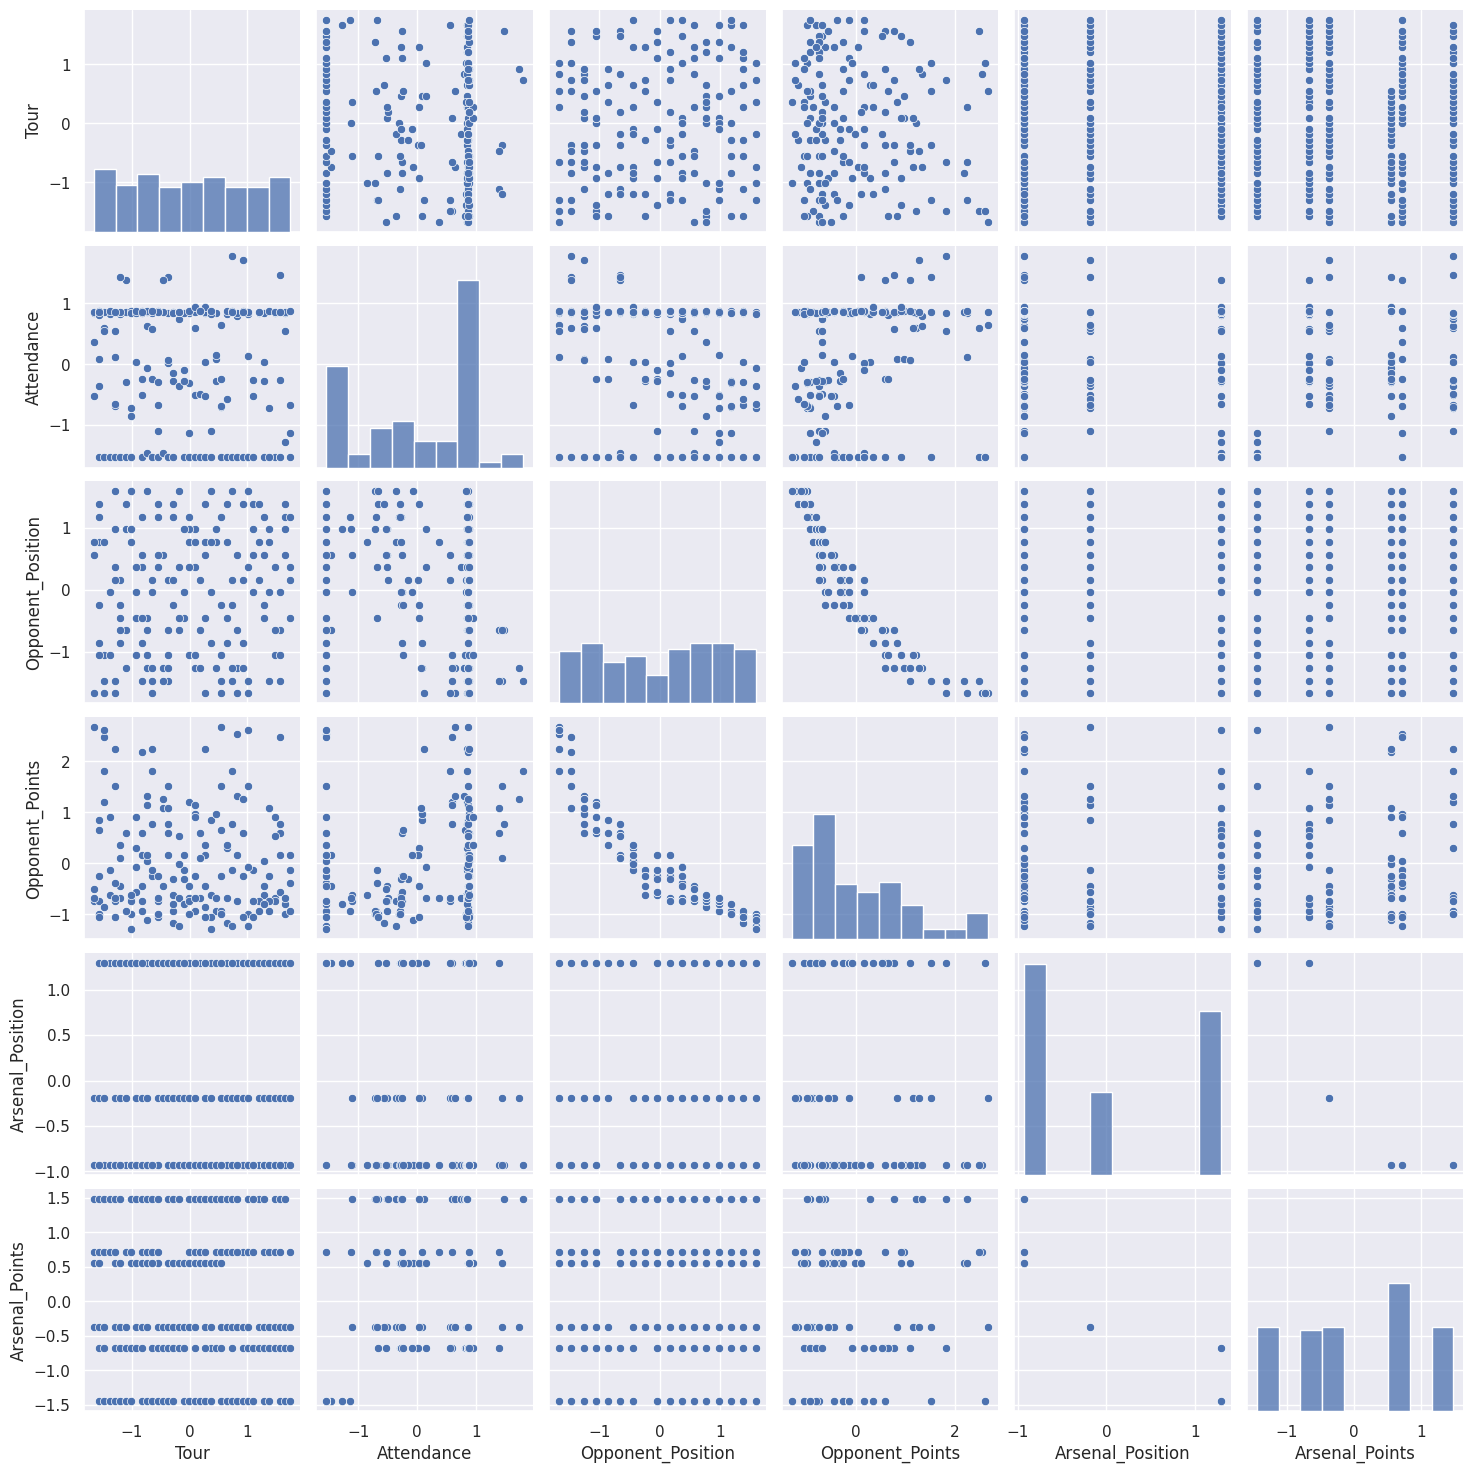

In [94]:
x_exp_num = x[["Tour", "Attendance", "Opponent_Position", "Opponent_Points", "Arsenal_Position", "Arsenal_Points"]]

sns.pairplot(x_exp_num)
plt.show()

In [95]:
x_exp_num.corr()

,Tour,Attendance,Opponent_Position,Opponent_Points,Arsenal_Position,Arsenal_Points
Tour,1.000000,-0.115311,0.079425,-0.091935,0.077876,-0.059736
Attendance,-0.115311,1.000000,-0.153394,0.136596,-0.355069,0.432925
Opponent_Position,0.079425,-0.153394,1.000000,-0.924585,-0.004884,0.009124
Opponent_Points,-0.091935,0.136596,-0.924585,1.000000,0.004107,0.001197
Arsenal_Position,0.077876,-0.355069,-0.004884,0.004107,1.000000,-0.896633
Arsenal_Points,-0.059736,0.432925,0.009124,0.001197,-0.896633,1.000000


There is an issue with multicollinearity over the threshold of 0.7 on Opponent_Position with Opponent Points and Arsenal_Points with Arsenal_Position. We might have to be skeptical when interpreting the slopes reflecting the relationship between explanatory variables and the response variable.

In [96]:
df_coef.sort_values(by=["Final Model Slopes"])

,Final Model Slopes
Opponent_Points,-0.973082
Opponent_Position,-0.571285
Time_night,-0.308347
Arsenal_Position,-0.171517
Arsenal_Points,-0.111382
Time_noon,0.000000
Coach_Unai Emery,0.000000
Tour,0.038565
Attendance,0.179896
Coach_Mikel Arteta,0.674869


Due to multicollinearity, we are not able to interpret our slopes reflecting the relationship between explanatory variables and response variables. We will keep in process with caution related to the interpretation of the slopes reflecting the relationship between the response variable and explanatory or indicator variables.

If we consider which explanatory variables are most important, we can identify them by the absolute value of the slopes from highest to lowest value.

- The most important explanatory (or indicator) variables for predicting the probability for the new dataset are HoAw home
- The second most important explanatory (or indicator) variable for predicting the probability for the new dataset is Opponent Points
- The third most important explanatory (or indicator) variable for predicting the probability for the new dataset is Coach Mikel Arteta
- The fourth most important explanatory (or indicator) variable for predicting the probability for the new dataset is Opponent Position
- The fifth most important explanatory (or indicator) variable for predicting the probability for the new dataset is Time night
- The sixth most important explanatory (or indicator) variable for predicting the probability for the new dataset is Attendance
- The seventh most important explanatory (or indicator) variable for predicting the probability for the new dataset is Arsenal Position
- The eighth most important explanatory (or indicator) variable for predicting probability for the new dataset is Arsenal Points
- The ninth most important explanatory (or indicator) variable for predicting probability for the new dataset is Tour

However, we have to remember that it is skeptical of this interpretation due to the multicollinearity issue.

### 7.5. Overfitting 

There are explanatory variables that may lead to overfitting the model due to zeroed out slopes in the ElasticNet with penalization. The best model suggests that explanatory variables of Time noon and Coach Unai Emery would lead to overfitting the model.

Let's identify the relationship between the response variable and explanatory variables that lead to overfitting in the model to describe the strength association.

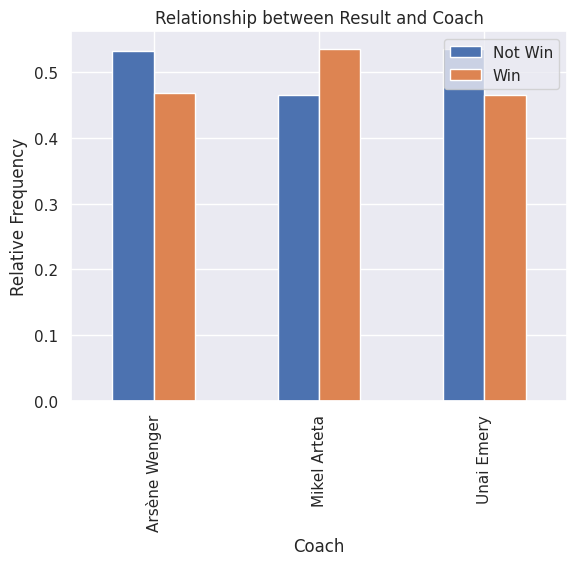

In [97]:
coach_result.plot.bar()
plt.legend(loc="upper right")
plt.ylabel("Relative Frequency")
plt.title("Relationship between Result and Coach")
plt.show()

There is no strong association between the response variable of Result and the explanatory variable of Coach. The measurements of each box are similar in size.

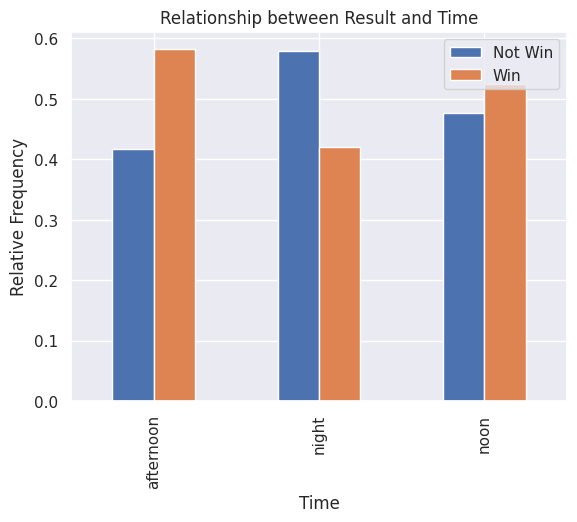

In [98]:
time_result.plot.bar()
plt.legend(loc="upper right")
plt.ylabel("Relative Frequency")
plt.title("Relationship between Result and Time")
plt.show()

There is less association between the response variable of Result and the explanatory variable of Time because the measurements of boxes are of similar sizes. 

It shows that there is an association between the response variable and overfitting explanatory variables. Then, there might be highly 

Let's identify again the relationship between overfitting explanatory variables and other explanatory variables when predicting the response variable.

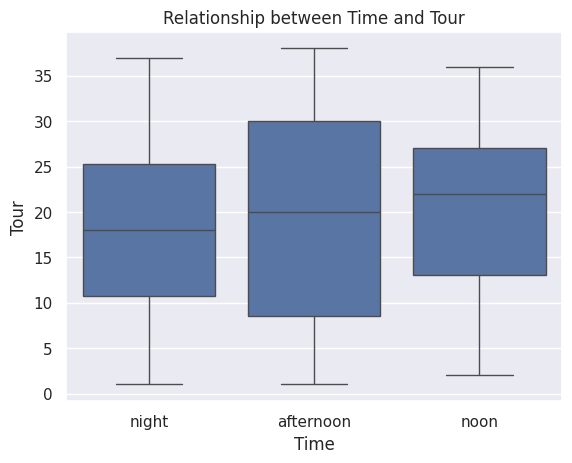

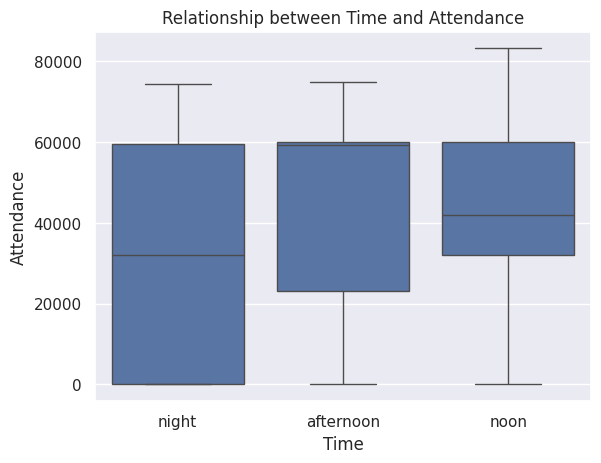

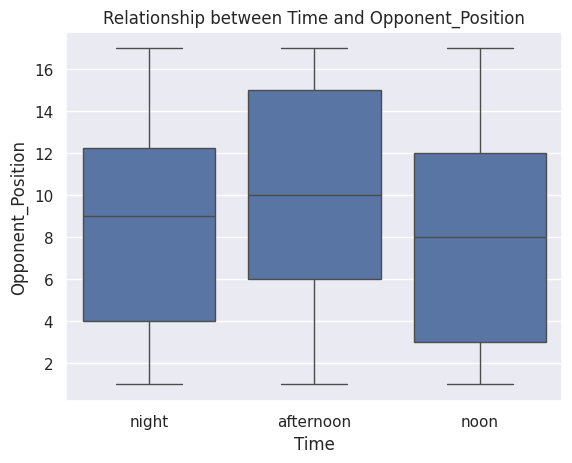

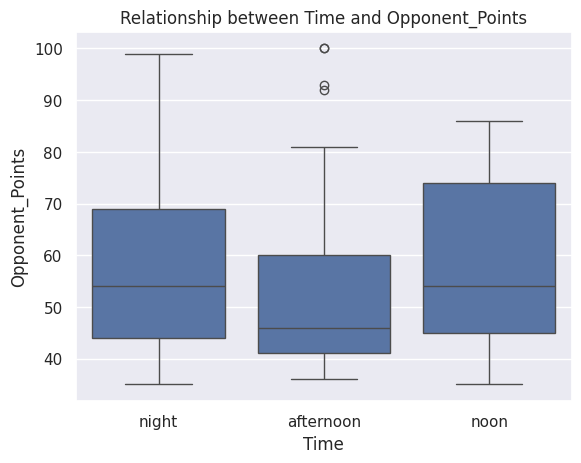

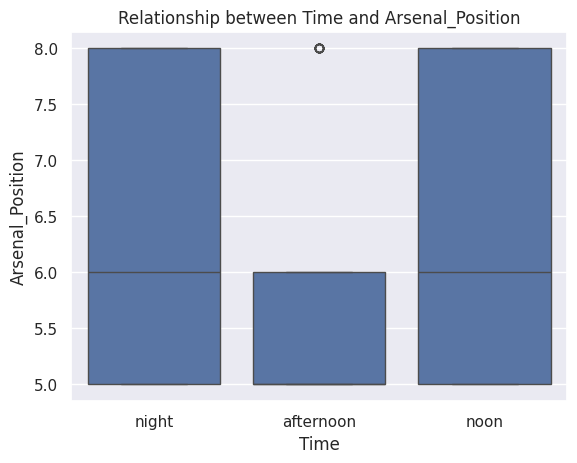

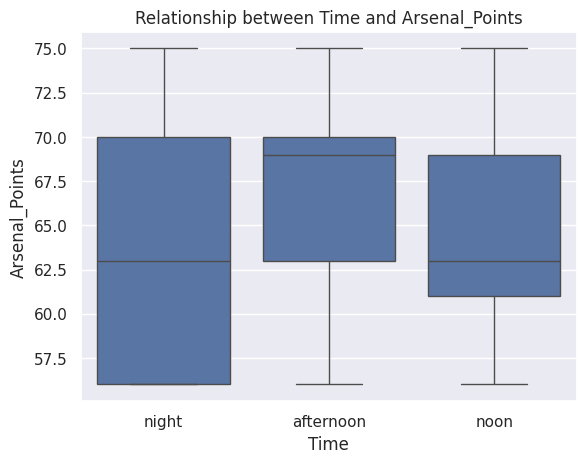

In [99]:

for i in x_exp_num.columns:
    sns.boxplot(x="Time", y=i, data=df)
    plt.title(f"Relationship between Time and {i}")
    plt.xlabel("Time")
    plt.ylabel(f"{i}")
    plt.show()


We can see that the categorical variable of Time of noon indicator variable has highly overlapped with the night indicator variable while showing the relationship between all our numerical explanatory variables. Overall, there is no association with Time and all numerical variables (Tour, Attendance, Opponent_Position, Opponent_Points, Arsenal Position, Arsenal Points).

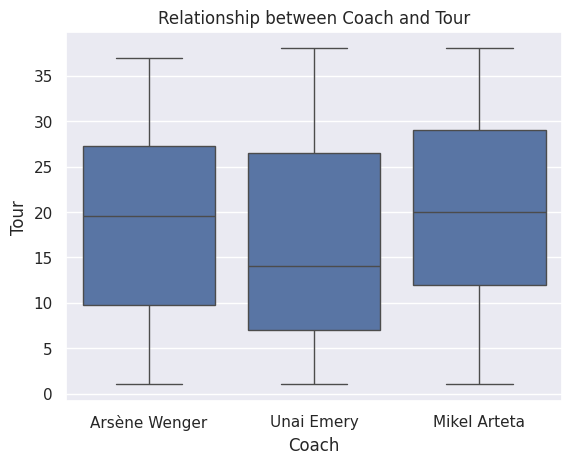

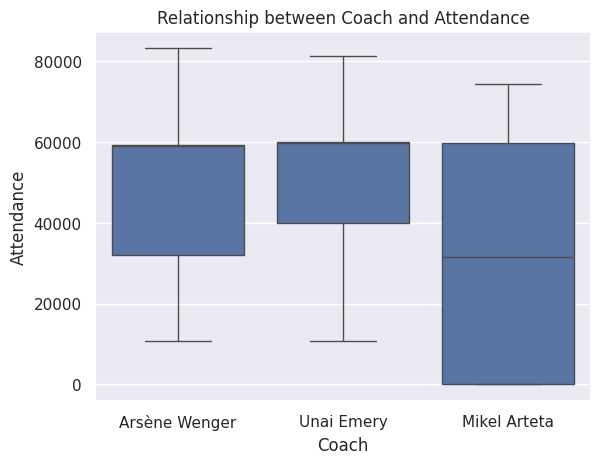

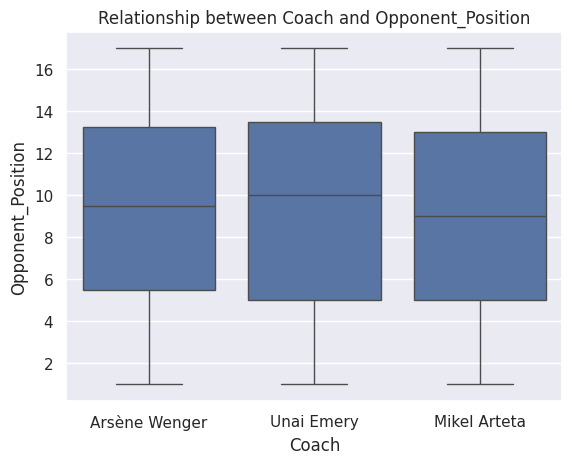

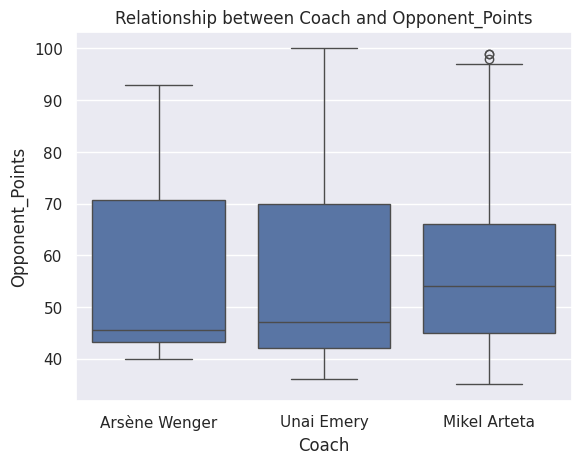

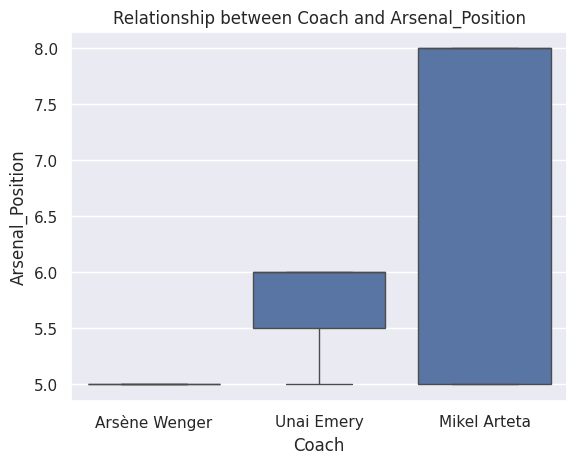

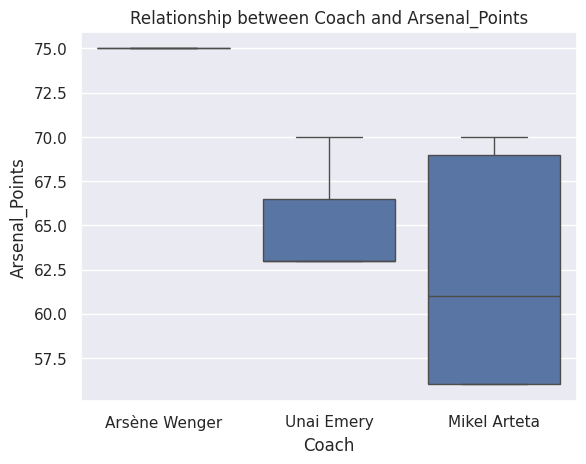

In [100]:

for i in x_exp_num.columns:
    sns.boxplot(x="Coach", y=i, data=df)
    plt.title(f"Relationship between Coach and {i}")
    plt.xlabel("Coach")
    plt.ylabel(f"{i}")
    plt.show()


The side-by-side boxplot suggests that Coach has less association with all explanatory numerical variables, as there is are high overlap between Unai Emery and Mikel Arteta indicator variables.

Let's identify the relationship between Time and Coach of categorical (or indicator) variables impacted by overfitting through a side-by-side bar plot.

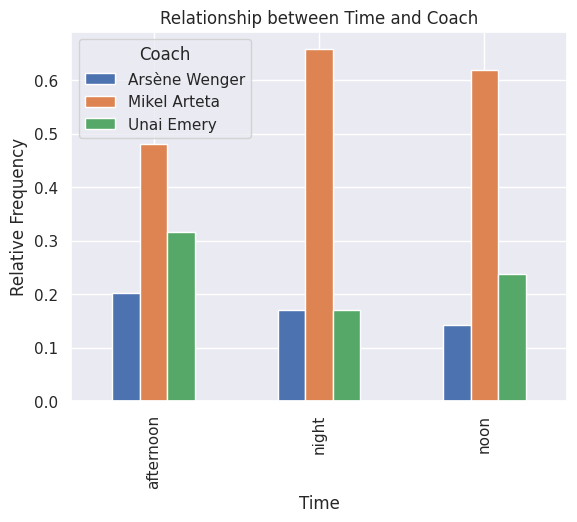

In [101]:
time_coach = pd.crosstab(df["Time"], df["Coach"], normalize="index")

time_coach.plot.bar()
plt.title("Relationship between Time and Coach")
plt.ylabel("Relative Frequency")
plt.show()

There is a strong association between Coach and Time due to at least a measurement difference in the same color box. 

Overall, there is less association between the categorical variables (Coach and Time) with the response variable of the game result of Arsenal. Additionally, there is are strong association between Time and Coach. This might suggest the Coach and Time have less impact and instability on predicting the probability of the Result of the game.

### 7.6. Test ROC and AUC

Our success level is Arsenal winning the game, and the failure level is Arsenal not winning the game (losing or tying). Let's calculate the best Elastic Net model of predictive probabilities for the test dataset.

Let's identify again the relationship between overfitting explanatory variables and other explanatory variables when predicting the response variable.

In [102]:
final_mod_predictive_prob = final_mod.predict_proba(x_test)[:,1]
final_mod_predictive_prob

array([0.6522244 , 0.67932408, 0.71424988, 0.6156395 , 0.30104616,
       0.2674717 , 0.64555144, 0.55985212, 0.30230776, 0.70406763,
       0.4318629 , 0.50382951, 0.70864247, 0.5928575 , 0.46962502,
       0.47349868, 0.34351148, 0.32180276, 0.43278506, 0.37117641,
       0.53136416, 0.6522768 , 0.3748474 , 0.6237875 , 0.60254703,
       0.38578558, 0.62826858, 0.67559444, 0.19776687, 0.69790261,
       0.33076336, 0.581132  , 0.61526276, 0.72972333, 0.39685055,
       0.2040013 ])

The true positive rate of Arsenal winning the game is classified as winning (tpr), and the false positive rate (fpr) of Arsenal not winning (losing or tying) the game is classified as winning. Let's build the ROC curve that can measure how well a given predictive Elastic Net model and AUC score that calculates how close the ROC curve gets to ideal classification (fpr=0 and tpr=1) will do when it comes to classifying the observations in the given test dataset.

In [103]:
def plot_roc(fpr, tpr, auc, lw = 2):
    plt.plot(fpr, tpr, color = "darkorange", lw=lw,
             label = 'ROC Curve (area = '+str(round(auc,3))+')')
    plt.plot([0,1], [0,1], color="navy", lw=lw, linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.show()


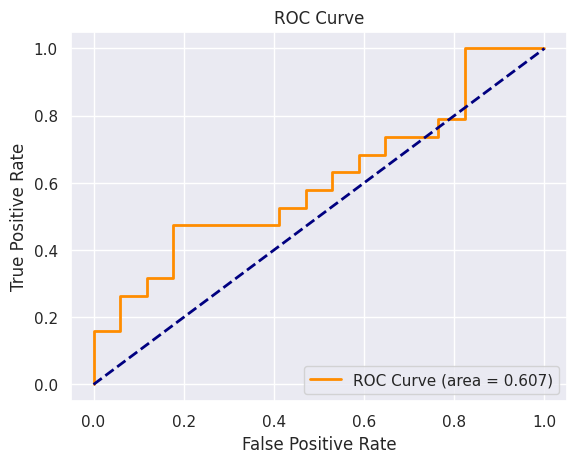

In [104]:
fprs, tprs, thresholds = roc_curve(y_true = y_test,
                                y_score = final_mod_predictive_prob)
auc = roc_auc_score(y_true = y_test,
                    y_score = final_mod_predictive_prob)
plot_roc(fprs, tprs, auc)

The AUC score of this ROC curve is 0.604.

We use the test dataset performance as a proxy for how new datasets will perform with a given model.

Because the ElasticNet regularization model had the highest test mean AUC score using the Lambda value of x and Alpha value of y, this model does not have some predictive probability threshold that gets the closest to the ideal classification scenario for the test dataset of fpr = 0, tpr = 1, and AUC = 1. It is almost closest to test AUC score 0.5, the realistic worst case scenario ROC is 0.5. 

### 7.7. Best Predictive Probability Threshold

Using our best predictive probability of the Logistic Model for winning Arsenal, let's identify the thresholds, the true positive rate of Arsenal winning the game is classified as winning (tpr), and the false positive rate of Arsenal not winning (Losing or Tie the game) is classified as winngin the game (fpr). 

In [105]:
df_thresholds = pd.DataFrame({"fprs": fprs, "tprs":tprs, "thresholds": thresholds})
df_thresholds

,fprs,tprs,thresholds
0,0.000000,0.000000,1.729723
1,0.000000,0.052632,0.729723
2,0.000000,0.157895,0.708642
3,0.058824,0.157895,0.704068
4,0.058824,0.263158,0.679324
5,0.117647,0.263158,0.675594
6,0.117647,0.315789,0.652277
7,0.176471,0.315789,0.652224
8,0.176471,0.473684,0.623787
9,0.411765,0.473684,0.592858


As the model has a bad performance on predicting probability using the thresholds on winning or losing the game for Arsenal, tpr and fpr are increasing at the same time as the thresholds change. Our ideal classification is tpr = 1 and fpr = 0, and we will choose the threshold that has the highest difference from tpr to fpr, considering at least the best ideal classification for the new dataset.

In [106]:
prob_diff = (df_thresholds["tprs"] - df_thresholds["fprs"])
prob_diff

0     0.000000
1     0.052632
2     0.157895
3     0.099071
4     0.204334
5     0.145511
6     0.198142
7     0.139319
8     0.297214
9     0.061920
10    0.114551
11    0.055728
12    0.108359
13    0.049536
14    0.102167
15    0.043344
16    0.095975
17    0.037152
18    0.089783
19   -0.027864
20    0.024768
21   -0.034056
22    0.176471
23    0.000000
dtype: float64

In [107]:
best_prob_diff = prob_diff.max().tolist()

best_prob_diff

0.29721362229102166

The biggest difference between tpr and fpr is **, and we will find which threshold, tpr, and fpr corresponds to that difference of **.

In [108]:
index_best_prob = np.where(prob_diff == best_prob_diff)[0][0]

df_thresholds.iloc[index_best_prob]

fprs          0.176471
tprs          0.473684
thresholds    0.623787
Name: 8, dtype: float64

The best threshold for our model classification is:
- Threshold = **
- Sensitivity rate (Tpr) =**
- Specificity rate (Tnr)= 1-0.176471 =**

We define the sensitivity (tpr) **% of the given Elastic Net of Logistic classifier model with ** threshold as the percent of observations of Arsenal that are actually winning the game on correctly predicted to be winning the game.

Additionally we define the specificity **% (also known as true negative rate, tnr) of a given Elastic Net of Logistic classifier model with ** threshold as the percent of observations of Arsenal are actually not winning (lose or tie) the game and it correctly predicted to be not winning (lose or tie) the game. 

### 8. Additional Analysis - AIC

Just like how adjusted R^2 can tell us how parsimonious a linear regression model is, AIC can tell us how parsimonious a logistic regression model is. If we wanted to find the most parsimonious model, we could use forward selection to determine which explanatory variables decrease our AIC and thus bring enough predictive power and should be included in our most parsimonious model. These variables included in this model will strike the best balance between overfitting and underfitting the model.

In [109]:
mod_no_vars = smf.logit("Result_Response ~ 1", data=df).fit()
print(f"mod_no_vars AIC: {mod_no_vars.aic}")

mod_time = smf.logit("Result_Response ~ Time", data=df).fit()
print(f"mod_time AIC: {mod_time.aic}")

mod_hoaw = smf.logit("Result_Response ~ HoAw", data=df).fit()
print(f"mod_hoaw AIC: {mod_hoaw.aic}")

mod_coach = smf.logit("Result_Response ~ Coach", data=df).fit()
print(f"mod_coach AIC: {mod_coach.aic}")

mod_ars_pos = smf.logit("Result_Response ~ Arsenal_Position", data=df).fit()
print(f"mod_ars_pos AIC: {mod_ars_pos.aic}")

mod_tour = smf.logit("Result_Response ~ Tour", data=df).fit()
print(f"mod_tour AIC: {mod_tour.aic}")

mod_attend = smf.logit("Result_Response ~ Attendance", data=df).fit()
print(f"mod_attend AIC: {mod_attend.aic}")

mod_opp_pts = smf.logit("Result_Response ~ Opponent_Points", data=df).fit()
print(f"mod_opp_pts AIC: {mod_opp_pts.aic}")

mod_ars_pts = smf.logit("Result_Response ~ Arsenal_Points", data=df).fit()
print(f"mod_ars_pts AIC: {mod_ars_pts.aic}")

mod_opp_pos = smf.logit("Result_Response ~ Opponent_Position", data=df).fit()
print(f"mod_opp_pos AIC: {mod_opp_pos.aic}")


Optimization terminated successfully.
         Current function value: 0.693083
         Iterations 3
mod_no_vars AIC: 245.96507979521095
Optimization terminated successfully.
         Current function value: 0.681501
         Iterations 4
mod_time AIC: 245.88847983847648
Optimization terminated successfully.
         Current function value: 0.664247
         Iterations 4
mod_hoaw AIC: 237.81508612709615
Optimization terminated successfully.
         Current function value: 0.690817
         Iterations 3
mod_coach AIC: 249.16771593519798
Optimization terminated successfully.
         Current function value: 0.692974
         Iterations 3
mod_ars_pos AIC: 247.92672354953115
Optimization terminated successfully.
         Current function value: 0.691058
         Iterations 4
mod_tour AIC: 247.25247719584678
Optimization terminated successfully.
         Current function value: 0.689471
         Iterations 4
mod_attend AIC: 246.69390639709258
Optimization terminated successfully.
        

The model with just "HoAw" has the lowest AIC, so we proceed with building a model from there. "HoAw" brings the most predictive power to our model.

In [110]:

mod_hoaw_time = smf.logit("Result_Response ~ HoAw + Time", data=df).fit()
print(f"mod_hoaw_time AIC: {mod_hoaw_time.aic}")

mod_hoaw_coach = smf.logit("Result_Response ~ HoAw + Coach", data=df).fit()
print(f"mod_hoaw_coach AIC: {mod_hoaw_coach.aic}")

mod_hoaw_ars_pos = smf.logit("Result_Response ~ HoAw + Arsenal_Position", data=df).fit()
print(f"mod_hoaw_ars_pos AIC: {mod_hoaw_ars_pos.aic}")

mod_hoaw_tour = smf.logit("Result_Response ~ HoAw + Tour", data=df).fit()
print(f"mod_hoaw_tour AIC: {mod_hoaw_tour.aic}")

mod_hoaw_attend = smf.logit("Result_Response ~ HoAw + Attendance", data=df).fit()
print(f"mod_hoaw_attend AIC: {mod_hoaw_attend.aic}")

mod_hoaw_opp_pts = smf.logit("Result_Response ~ HoAw + Opponent_Points", data=df).fit()
print(f"mod_hoaw_opp_pts AIC: {mod_hoaw_opp_pts.aic}")

mod_hoaw_ars_pts = smf.logit("Result_Response ~ HoAw + Arsenal_Points", data=df).fit()
print(f"mod_hoaw_ars_pts AIC: {mod_hoaw_ars_pts.aic}")

mod_hoaw_opp_pos = smf.logit("Result_Response ~ HoAw + Opponent_Position", data=df).fit()
print(f"mod_hoaw_opp_pos AIC: {mod_hoaw_opp_pos.aic}")


Optimization terminated successfully.
         Current function value: 0.653608
         Iterations 5
mod_hoaw_time AIC: 238.07014395944185
Optimization terminated successfully.
         Current function value: 0.661272
         Iterations 4
mod_hoaw_coach AIC: 240.76791848794278
Optimization terminated successfully.
         Current function value: 0.664098
         Iterations 4
mod_hoaw_ars_pos AIC: 239.7624266833564
Optimization terminated successfully.
         Current function value: 0.661825
         Iterations 4
mod_hoaw_tour AIC: 238.9625418554288
Optimization terminated successfully.
         Current function value: 0.664213
         Iterations 4
mod_hoaw_attend AIC: 239.8028228383937
Optimization terminated successfully.
         Current function value: 0.639917
         Iterations 5
mod_hoaw_opp_pts AIC: 231.25073758137285
Optimization terminated successfully.
         Current function value: 0.664229
         Iterations 4
mod_hoaw_ars_pts AIC: 239.80853798858726
Optimizatio

The model with "HoAw" and "Opponent_Points" has the lowest AIC, so we proceed with building a model from there. "Opponent_Points" brings the second most predictive power to our model.

In [111]:
mod_hoaw_oppPts_time = smf.logit("Result_Response ~ HoAw + Opponent_Points + Time", data=df).fit()
print(f"mod_hoaw_oppPts_time AIC: {mod_hoaw_oppPts_time.aic}")

mod_hoaw_oppPts_coach = smf.logit("Result_Response ~ HoAw + Opponent_Points + Coach", data=df).fit()
print(f"mod_hoaw_oppPts_coach AIC: {mod_hoaw_oppPts_coach.aic}")

mod_hoaw_oppPts_ars_pos = smf.logit("Result_Response ~ HoAw + Opponent_Points + Arsenal_Position", data=df).fit()
print(f"mod_hoaw_oppPts_ars_pos AIC: {mod_hoaw_oppPts_ars_pos.aic}")

mod_hoaw_oppPts_tour = smf.logit("Result_Response ~ HoAw + Opponent_Points + Tour", data=df).fit()
print(f"mod_hoaw_oppPts_tour AIC: {mod_hoaw_oppPts_tour.aic}")

mod_hoaw_oppPts_attend = smf.logit("Result_Response ~ HoAw + Opponent_Points + Attendance", data=df).fit()
print(f"mod_hoaw_oppPts_attend AIC: {mod_hoaw_oppPts_attend.aic}")

mod_hoaw_oppPts_ars_pts = smf.logit("Result_Response ~ HoAw + Opponent_Points + Arsenal_Points", data=df).fit()
print(f"mod_hoaw_oppPts_ars_pts AIC: {mod_hoaw_oppPts_ars_pts.aic}")

mod_hoaw_oppPts_opp_pos = smf.logit("Result_Response ~ HoAw + Opponent_Points + Opponent_Position", data=df).fit()
print(f"mod_hoaw_oppPts_opp_pos AIC: {mod_hoaw_oppPts_opp_pos.aic}")


Optimization terminated successfully.
         Current function value: 0.632181
         Iterations 5
mod_hoaw_oppPts_time AIC: 232.52777411613
Optimization terminated successfully.
         Current function value: 0.635957
         Iterations 5
mod_hoaw_oppPts_coach AIC: 233.8568337518294
Optimization terminated successfully.
         Current function value: 0.639787
         Iterations 5
mod_hoaw_oppPts_ars_pos AIC: 233.204968035857
Optimization terminated successfully.
         Current function value: 0.638514
         Iterations 5
mod_hoaw_oppPts_tour AIC: 232.75708429746757
Optimization terminated successfully.
         Current function value: 0.639106
         Iterations 5
mod_hoaw_oppPts_attend AIC: 232.9654377518276
Optimization terminated successfully.
         Current function value: 0.639898
         Iterations 5
mod_hoaw_oppPts_ars_pts AIC: 233.24414095256083
Optimization terminated successfully.
         Current function value: 0.632581
         Iterations 5
mod_hoaw_oppPt

The model with "HoAw," "Opponent_Points," and "Opponent_Position" has the lowest AIC, so we proceed with building a model from there. "Opponent_Position" brings the third most predictive power to our model.

In [112]:
mod_hoaw_oppPts_oppPos_time = smf.logit("Result_Response ~ HoAw + Opponent_Points + Opponent_Position + Time", data=df).fit()
print(f"mod_hoaw_oppPts_oppPos_time AIC: {mod_hoaw_oppPts_oppPos_time.aic}")

mod_hoaw_oppPts_oppPos_coach = smf.logit("Result_Response ~ HoAw + Opponent_Points + Opponent_Position + Coach", data=df).fit()
print(f"mod_hoaw_oppPts_oppPos_coach AIC: {mod_hoaw_oppPts_oppPos_coach.aic}")

mod_hoaw_oppPts_oppPos_ars_pos = smf.logit("Result_Response ~ HoAw + Opponent_Points + Opponent_Position + Arsenal_Position", data=df).fit()
print(f"mod_hoaw_oppPts_oppPos_ars_pos AIC: {mod_hoaw_oppPts_oppPos_ars_pos.aic}")

mod_hoaw_oppPts_oppPos_tour = smf.logit("Result_Response ~ HoAw + Opponent_Points + Opponent_Position + Tour", data=df).fit()
print(f"mod_hoaw_oppPts_oppPos_tour AIC: {mod_hoaw_oppPts_oppPos_tour.aic}")

mod_hoaw_oppPts_oppPos_attend = smf.logit("Result_Response ~ HoAw + Opponent_Points + Opponent_Position + Attendance", data=df).fit()
print(f"mod_hoaw_oppPts_oppPos_attend AIC: {mod_hoaw_oppPts_oppPos_attend.aic}")

mod_hoaw_oppPts_oppPos_ars_pts = smf.logit("Result_Response ~ HoAw + Opponent_Points + Opponent_Position + Arsenal_Points", data=df).fit()
print(f"mod_hoaw_oppPts_oppPos_ars_pts AIC: {mod_hoaw_oppPts_oppPos_ars_pts.aic}")


Optimization terminated successfully.
         Current function value: 0.625392
         Iterations 5
mod_hoaw_oppPts_oppPos_time AIC: 232.13810983328483
Optimization terminated successfully.
         Current function value: 0.627832
         Iterations 5
mod_hoaw_oppPts_oppPos_coach AIC: 232.99671874846035
Optimization terminated successfully.
         Current function value: 0.632450
         Iterations 5
mod_hoaw_oppPts_oppPos_ars_pos AIC: 232.62237929457996
Optimization terminated successfully.
         Current function value: 0.631227
         Iterations 5
mod_hoaw_oppPts_oppPos_tour AIC: 232.1918373603369
Optimization terminated successfully.
         Current function value: 0.631982
         Iterations 5
mod_hoaw_oppPts_oppPos_attend AIC: 232.4578199448714
Optimization terminated successfully.
         Current function value: 0.632527
         Iterations 5
mod_hoaw_oppPts_oppPos_ars_pts AIC: 232.64967973801322


None of these models has a lower AIC than our "mod_hoaw_oppPts_opp_pos" model. As a result, we can conclude that a model with "HoAw," "Opponent_Points," and "Opponent_Position" is the most parsimonious, or a balance of overfitting and underfitting, with an AIC of 230.66840460617325. The model we have just built could help us with our primary and secondary goals because with forward selection, we chose the variables that'll help us best predict the result of an Arsenal matches while also avoiding explanatory variables that might overfit the model or lead to misleading conclusions about the predictive power of other explanatory variables. However, we have to be very skeptical of the conclusions we draw from this model; "Opponent_Points" and "Opponent_Position" are a collinear pair, which can lead to misleading conclusions about whether or not these variables bring enough predictive power. Overall, we wouldn't recommend using this model either.

# Conclusion

In conclusion, the best model performed in the analysis was the Elastic Net model, using a Lambda value of 0.68 and an Alpha value of 0.9. The Elasticnet was the best-performing model with an AUC mean score of 0.67, which performed similarly to the Lasso model. While the Elastic model did have the highest test AUC, we would not suggest this model to Arsenal soccer fans and data analysts for the team because the AUC score was poor due to the parsimonious model, including multicollinearity variables, which caused issues. It became skeptical to interpret the slopes of the explanatory variables with multicollinearity issues can lead to worse performance for the new dataset. When determining whether the best model was fit to predict the outcome of soccer games for Arsenal, the AUCs of the model's ROC had an area of 0.607, meaning it struggles to distinguish between positive and negative classes and is slightly better than guessing the classification (ROC 0.5). We do not know that the best model will yield the highest possible average test AUC score out of all the models because we did not consider dealing with any multicollinearity. In future work, we could consider dealing with the multicollinearity of explanatory variables or indicator variables, which might or might not increase the AUC score of the best model. We can also get more past data on Arsenal seasons, rather than about 6 seasons' worth of data, since the intensity of the game of soccer and the players change yearly. 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b91afa0e-2ab6-4efa-8cd3-59307a09e634' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>